# SONM active deal analyzer

## This notebook is to analyze active deals on the SONM platform in real-time.

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

In [3]:
import datetime


In [4]:
pd.Timestamp.now()

Timestamp('2018-09-11 20:54:33.514426')

In [5]:
from matplotlib import pyplot as plt

### ipython magic to plot in a notebook

In [6]:
%matplotlib inline

### SONM's DWH spits out API information of active deals.  Using Jupyter's magic to run BASH command to save the API data to livedeal.txt

In [7]:
!curl -s https://dwh.livenet.sonm.com:15022/DWHServer/GetDeals/ -d '{"status":1}' > livedeal.txt

In [8]:
!curl -s https://dwh.livenet.sonm.com:15022/DWHServer/GetDeals/ -d '{"status":2}' > history.txt

In [9]:
!curl -s https://dwh.livenet.sonm.com:15022/DWHServer/GetDeals/ -d '{"status":0}' > all.txt

### Open the saved text in Jupyter

In [10]:
f = open('all.txt','r')

### Convert opened file to Pandas dataframe.

In [11]:
k = f.readlines()

In [12]:
r = k[0].split(',')

In [13]:
headposition = []
i = 0
for item in r:
    if 'deal' in item:

        headposition.append(i)
    i = i+1

In [14]:
testlist = []
for i in range(len(headposition)):
    if headposition[i]>0:
        #print(int(headposition[i-1])-int(headposition[i]))
        # Selecting only spot deals
        if (int(headposition[i-1])-int(headposition[i])) == -30:
        #print(r[headposition[i-1] : headposition[i]])
        #print(int([headposition[i-1]])-int([headposition[i]]))
            testlist.append(r[headposition[i-1] : headposition[i]])

In [15]:
df = pd.DataFrame(testlist)

In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,"{""deals"":[{""deal"":{""id"":""4820""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,"""endTime"":""2018-08-22T21:01:37Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""127078752338240""","""lastBillTS"":""2018-08-22T21:01:37Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4RT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG..."
1,"{""deal"":{""id"":""1065""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,2,8513388544,...,"""endTime"":""2018-07-10T21:07:52Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""31482686954315528""","""lastBillTS"":""2018-07-10T21:07:52Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W10=""}"
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""endTime"":""2018-06-30T12:34:19Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""2064655339296484310""","""lastBillTS"":""2018-06-30T12:34:19Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT..."
3,"{""deal"":{""id"":""4823""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,"""endTime"":""2018-08-22T21:04:31Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""119844109107912""","""lastBillTS"":""2018-08-22T21:04:31Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4RT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG..."
4,"{""deal"":{""id"":""9""","""benchmarks"":{""values"":[1010",1293,2,2000000000,67108864,10000000,10000000,1,4288299008,...,"""endTime"":""2018-06-30T13:12:55Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""8267235481299858""","""lastBillTS"":""2018-06-30T13:12:55Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}"


In [17]:
df.shape

(6362, 30)

## Data Cleaning

### The 14 column contains consumer ID.  First clean this colum.

In [18]:
df[14]

0       "consumerID":"0x4e452D1EB085A15d3f9544Ffedf9F8...
1       "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
2       "consumerID":"0x517648Ec2E592969Ec344642034F07...
3       "consumerID":"0x4e452D1EB085A15d3f9544Ffedf9F8...
4       "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
5       "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
6       "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
7       "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
8       "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
9       "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
10      "consumerID":"0x384B08b25B4B78eb43969b2500999d...
11      "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
12      "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
13      "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
14      "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
15      "consumerID":"0x417c92FbD944b125A578848DE44a4F...
16      "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
17      "consu

### Make a little funtion to trim unnecessary charactors

In [19]:
def Supplier_ID_conversion(content):
    return content[14:-1]

###  And applyt to pandas data frame.  New column called consumer_ID is generated.

In [20]:
df['consumer_ID'] = df[14].apply(Supplier_ID_conversion)

In [21]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,consumer_ID
0,"{""deals"":[{""deal"":{""id"":""4820""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""127078752338240""","""lastBillTS"":""2018-08-22T21:01:37Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4RT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA
1,"{""deal"":{""id"":""1065""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,2,8513388544,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""31482686954315528""","""lastBillTS"":""2018-07-10T21:07:52Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W10=""}",0x1124fCC307756f4077c5e8E09b948C1CA7123eC9
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""2064655339296484310""","""lastBillTS"":""2018-06-30T12:34:19Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025
3,"{""deal"":{""id"":""4823""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""119844109107912""","""lastBillTS"":""2018-08-22T21:04:31Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4RT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA
4,"{""deal"":{""id"":""9""","""benchmarks"":{""values"":[1010",1293,2,2000000000,67108864,10000000,10000000,1,4288299008,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""8267235481299858""","""lastBillTS"":""2018-06-30T13:12:55Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",0x1124fCC307756f4077c5e8E09b948C1CA7123eC9


## supplier

###  Same trick for the supplier ID.  The 13 column contains supplier ID information.  Clean with the same function.

In [22]:
df[13]

0       "supplierID":"0x70eC78FAF2CcD3fA3fe9567Fa5B835...
1       "supplierID":"0x26200241593722FA17DE5722Ed66d8...
2       "supplierID":"0xd0f1C2dafde206D97e37325f1d3104...
3       "supplierID":"0x70eC78FAF2CcD3fA3fe9567Fa5B835...
4       "supplierID":"0x20bab6140Ec5fA53b5bEd974A1Ab99...
5       "supplierID":"0x20bab6140Ec5fA53b5bEd974A1Ab99...
6       "supplierID":"0x20bab6140Ec5fA53b5bEd974A1Ab99...
7       "supplierID":"0x6BB6Be379E606AA3dE9c349fA83F69...
8       "supplierID":"0xE0babb8aB2cE8845B68e32a87d3352...
9       "supplierID":"0x4F5192bAB3D789A0E730F2018982B5...
10      "supplierID":"0x33f81Ee6f9d4716B1C13bA58FdAE5a...
11      "supplierID":"0x10b8A639FB9c5D09c6b50B3Db27e63...
12      "supplierID":"0x2f90D7A115cFAf62ea05eDF0E5C7E9...
13      "supplierID":"0x26200241593722FA17DE5722Ed66d8...
14      "supplierID":"0xEBB9099c31EF1C72a2E597cD4c0205...
15      "supplierID":"0xfb2c6c866e1022C94377Dc4f31E1aa...
16      "supplierID":"0x20bab6140Ec5fA53b5bEd974A1Ab99...
17      "suppl

In [23]:
df['supplier_ID'] = df[13].apply(Supplier_ID_conversion)

### Price

### Price value is shown as USD/s, so conver it to USD/h

In [24]:
unit = 10.0**18.0

4830442500000/unit * 60 *60

In [25]:
def Price_conversion(content):
    if 'price' in content:
        return float(content[9:-1])/unit * 60 *60
    if 'duration' in content:
        return float(content[11:-1])/unit * 60 * 60

In [26]:
df['price_USD/h'] = df[18].apply(Price_conversion)

###  ETH has rate

### The 10 column contains Ethash value.  Clean and convert to Mh/s.

In [27]:
df[10]

0               0
1        53259000
2        79806000
3               0
4        27518000
5        27470000
6        27470000
7        24722000
8        35642000
9        53250004
10              0
11       27459000
12       26543000
13       46570000
14       13125000
15      129853000
16       27470000
17              0
18       79806000
19              0
20       51290000
21              0
22       26670000
23       59824000
24       19934000
25      199600000
26       26670000
27       27470000
28       27470000
29       27470000
          ...    
6332     53152000
6333     12386000
6334     86627000
6335    172031000
6336     53152000
6337     11501000
6338    172031000
6339    160329000
6340    160329000
6341     86627000
6342    205768000
6343     28875000
6344    143156000
6345    160329000
6346    172031000
6347    143156000
6348     28494000
6349    137162000
6350     68606000
6351    137162000
6352    205768000
6353     86556000
6354     68606000
6355    160329000
6356    14

In [28]:
float(df[10][0])/1000000

0.0

In [29]:
def Ethash_conversion(content):
    return float(content)/1000000

In [30]:
Ethash_conversion(df[10][0])

0.0

In [31]:
df['Ethash'] = df[10].apply(Ethash_conversion)

In [32]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,consumer_ID,supplier_ID,price_USD/h,Ethash
0,"{""deals"":[{""deal"":{""id"":""4820""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,"""lastBillTS"":""2018-08-22T21:01:37Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4RT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,0.000100,0.000
1,"{""deal"":{""id"":""1065""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,2,8513388544,...,"""lastBillTS"":""2018-07-10T21:07:52Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W10=""}",0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.053870,53.259
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""lastBillTS"":""2018-06-30T12:34:19Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806
3,"{""deal"":{""id"":""4823""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,"""lastBillTS"":""2018-08-22T21:04:31Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4RT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,0.000100,0.000
4,"{""deal"":{""id"":""9""","""benchmarks"":{""values"":[1010",1293,2,2000000000,67108864,10000000,10000000,1,4288299008,...,"""lastBillTS"":""2018-06-30T13:12:55Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x20bab6140Ec5fA53b5bEd974A1Ab99472b576163,0.015794,27.518


# deal ID


In [33]:
df[0]

0       {"deals":[{"deal":{"id":"4820"
1                 {"deal":{"id":"1065"
2                    {"deal":{"id":"2"
3                 {"deal":{"id":"4823"
4                    {"deal":{"id":"9"
5                   {"deal":{"id":"16"
6                   {"deal":{"id":"14"
7                   {"deal":{"id":"15"
8                 {"deal":{"id":"1066"
9                 {"deal":{"id":"1794"
10                {"deal":{"id":"4509"
11                   {"deal":{"id":"8"
12                   {"deal":{"id":"3"
13                {"deal":{"id":"1064"
14                   {"deal":{"id":"4"
15                {"deal":{"id":"3620"
16                  {"deal":{"id":"12"
17                {"deal":{"id":"4814"
18                   {"deal":{"id":"5"
19                {"deal":{"id":"4821"
20                {"deal":{"id":"1073"
21                {"deal":{"id":"4825"
22                {"deal":{"id":"2289"
23                {"deal":{"id":"1075"
24                   {"deal":{"id":"7"
25                {"deal"

In [34]:
df[0][1]

'{"deal":{"id":"1065"'

In [35]:
df[0][1].index('"')

1

In [36]:
df[0][1].find('"')

1

In [37]:
df[0][1][:-1].rfind('"')

14

In [38]:
x = 1

df[0][x][df[0][x][:-1].rfind('"')+1:-1]

'1065'

In [39]:
x = 0

df[0][x][df[0][x][:-1].rfind('"')+1:-1]

'4820'

In [40]:
x = 5258

df[0][x][df[0][x][:-1].rfind('"')+1:-1]

'6036'

In [41]:
def convert_deal_ID(content):
    return int(content[content[:-1].rfind('"')+1:-1])

In [42]:
convert_deal_ID(df[0][1])

1065

In [43]:
df['deal_ID'] = df[0].apply(convert_deal_ID)

In [44]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID
0,"{""deals"":[{""deal"":{""id"":""4820""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4RT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,0.000100,0.000,4820
1,"{""deal"":{""id"":""1065""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,2,8513388544,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W10=""}",0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.053870,53.259,1065
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2
3,"{""deal"":{""id"":""4823""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4RT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,0.000100,0.000,4823
4,"{""deal"":{""id"":""9""","""benchmarks"":{""values"":[1010",1293,2,2000000000,67108864,10000000,10000000,1,4288299008,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x20bab6140Ec5fA53b5bEd974A1Ab99472b576163,0.015794,27.518,9


NameError: name 'df12' is not defined

# master node

In [45]:
df[15]

0       "masterID":"0xE9a8A72Ea514D70479c0db2E971355D4...
1       "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
2       "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
3       "masterID":"0xE9a8A72Ea514D70479c0db2E971355D4...
4       "masterID":"0xf5291bFDAA9324c42BEf942eCfC971EB...
5       "masterID":"0xf5291bFDAA9324c42BEf942eCfC971EB...
6       "masterID":"0xf5291bFDAA9324c42BEf942eCfC971EB...
7       "masterID":"0x22E00835bD4b84456Ab3aA5E61a7FF07...
8       "masterID":"0x24ceb5Ec6D7C58bD519974A6Ba76F50c...
9       "masterID":"0x6f74D76F4c4b80A61598bdED7Fca2f66...
10      "masterID":"0xb95b73D95bee11038Bab90cf2cc15985...
11      "masterID":"0xb3A8866183ca88ED3c233337C4f85045...
12      "masterID":"0x517648Ec2E592969Ec344642034F079c...
13      "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
14      "masterID":"0xd0ecfF77c5B50BAB4D865CB1254A14dd...
15      "masterID":"0xE9a8A72Ea514D70479c0db2E971355D4...
16      "masterID":"0xf5291bFDAA9324c42BEf942eCfC971EB...
17      "maste

In [46]:
df[15][0]

'"masterID":"0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F"'

In [47]:
df[15][0][12:-1]

'0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F'

In [48]:
def Master_ID_conversion(content):
    return content[12:-1]

In [49]:
df['master_ID'] =  df[15].apply(Master_ID_conversion)

In [50]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID
0,"{""deals"":[{""deal"":{""id"":""4820""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4RT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,0.000100,0.000,4820,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F
1,"{""deal"":{""id"":""1065""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,2,8513388544,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W10=""}",0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.053870,53.259,1065,0xedB7Ae4B946Cf249349974A02e354B5FBC577798
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798
3,"{""deal"":{""id"":""4823""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4RT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,0.000100,0.000,4823,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F
4,"{""deal"":{""id"":""9""","""benchmarks"":{""values"":[1010",1293,2,2000000000,67108864,10000000,10000000,1,4288299008,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x20bab6140Ec5fA53b5bEd974A1Ab99472b576163,0.015794,27.518,9,0xf5291bFDAA9324c42BEf942eCfC971EB95D56b33


# time stamp

# start time

In [51]:
df[19]

0       "startTime":"2018-08-22T20:57:55Z"
1       "startTime":"2018-07-10T21:03:31Z"
2       "startTime":"2018-06-30T09:15:34Z"
3       "startTime":"2018-08-22T21:01:01Z"
4       "startTime":"2018-06-30T13:07:55Z"
5       "startTime":"2018-06-30T14:07:43Z"
6       "startTime":"2018-06-30T13:27:58Z"
7       "startTime":"2018-06-30T14:00:13Z"
8       "startTime":"2018-07-10T21:05:04Z"
9       "startTime":"2018-07-19T13:01:16Z"
10      "startTime":"2018-08-19T21:10:17Z"
11      "startTime":"2018-06-30T12:53:04Z"
12      "startTime":"2018-06-30T12:23:37Z"
13      "startTime":"2018-07-10T21:02:52Z"
14      "startTime":"2018-06-30T12:31:01Z"
15      "startTime":"2018-08-15T15:35:34Z"
16      "startTime":"2018-06-30T13:17:16Z"
17      "startTime":"2018-08-22T20:56:04Z"
18      "startTime":"2018-06-30T12:34:46Z"
19      "startTime":"2018-08-22T20:58:19Z"
20      "startTime":"2018-07-10T21:09:55Z"
21      "startTime":"2018-08-22T21:02:01Z"
22      "startTime":"2018-07-26T22:46:28Z"
23      "st

In [52]:
df[19][0]

'"startTime":"2018-08-22T20:57:55Z"'

In [53]:
df[19][0][12:]

'"2018-08-22T20:57:55Z"'

In [54]:
pd.to_datetime("2018-07-24T13:37:46Z")

Timestamp('2018-07-24 13:37:46')

In [55]:
pd.to_datetime(df[19][0][13:-1])

Timestamp('2018-08-22 20:57:55')

In [56]:
def convert_starttime(content):
    return pd.to_datetime(content[13:-1])

In [57]:
convert_starttime(df[19][4])

Timestamp('2018-06-30 13:07:55')

In [58]:
df['starttime']= df[19].apply(convert_starttime)

In [59]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime
0,"{""deals"":[{""deal"":{""id"":""4820""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4RT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,0.000100,0.000,4820,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,2018-08-22 20:57:55
1,"{""deal"":{""id"":""1065""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,2,8513388544,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W10=""}",0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.053870,53.259,1065,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-10 21:03:31
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34
3,"{""deal"":{""id"":""4823""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4RT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,0.000100,0.000,4823,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,2018-08-22 21:01:01
4,"{""deal"":{""id"":""9""","""benchmarks"":{""values"":[1010",1293,2,2000000000,67108864,10000000,10000000,1,4288299008,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x20bab6140Ec5fA53b5bEd974A1Ab99472b576163,0.015794,27.518,9,0xf5291bFDAA9324c42BEf942eCfC971EB95D56b33,2018-06-30 13:07:55


# end time

In [60]:
df[20][0][11:-1]

'2018-08-22T21:01:37Z'

In [61]:
df[20][3406][11:-1]

'2018-08-19T02:29:05Z'

In [62]:
def convert_endtime(content):
    if content == '"endTime":"1970-01-01T00:00:00Z"':
        return pd.Timestamp.now()
    elif content == '1970-01-01':
        return pd.Timestamp.now()
    else:
        return pd.to_datetime(content[11:-1])

In [63]:
convert_endtime(df[20][3406][11:-1])

Timestamp('2018-09-11 02:29:05')

In [64]:
convert_endtime(df[20][5385][11:-1])

Timestamp('2018-09-11 16:30:37')

In [65]:
df['endtime']= df[20].apply(convert_endtime)

In [66]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime
0,"{""deals"":[{""deal"":{""id"":""4820""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,"""supplierCertificates"":""W3sib3duZXJJRCI6IjB4RT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,0.000100,0.000,4820,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,2018-08-22 20:57:55,2018-08-22 21:01:37
1,"{""deal"":{""id"":""1065""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,2,8513388544,...,"""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W10=""}",0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.053870,53.259,1065,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-10 21:03:31,2018-07-10 21:07:52
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19
3,"{""deal"":{""id"":""4823""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,"""supplierCertificates"":""W3sib3duZXJJRCI6IjB4RT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,0.000100,0.000,4823,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,2018-08-22 21:01:01,2018-08-22 21:04:31
4,"{""deal"":{""id"":""9""","""benchmarks"":{""values"":[1010",1293,2,2000000000,67108864,10000000,10000000,1,4288299008,...,"""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x20bab6140Ec5fA53b5bEd974A1Ab99472b576163,0.015794,27.518,9,0xf5291bFDAA9324c42BEf942eCfC971EB95D56b33,2018-06-30 13:07:55,2018-06-30 13:12:55


In [67]:
df['duration']=df['endtime']-df['starttime']

In [68]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration
0,"{""deals"":[{""deal"":{""id"":""4820""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,0.000100,0.000,4820,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,2018-08-22 20:57:55,2018-08-22 21:01:37,00:03:42
1,"{""deal"":{""id"":""1065""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,2,8513388544,...,"""consumerCertificates"":""W10=""}",0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.053870,53.259,1065,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-10 21:03:31,2018-07-10 21:07:52,00:04:21
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45
3,"{""deal"":{""id"":""4823""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,0.000100,0.000,4823,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,2018-08-22 21:01:01,2018-08-22 21:04:31,00:03:30
4,"{""deal"":{""id"":""9""","""benchmarks"":{""values"":[1010",1293,2,2000000000,67108864,10000000,10000000,1,4288299008,...,"""consumerCertificates"":""W10=""}",0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x20bab6140Ec5fA53b5bEd974A1Ab99472b576163,0.015794,27.518,9,0xf5291bFDAA9324c42BEf942eCfC971EB95D56b33,2018-06-30 13:07:55,2018-06-30 13:12:55,00:05:00


In [69]:
df[df['duration']<'0 minute']

,0,1,2,3,4,5,6,7,8,9,...,29,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration


In [70]:
sns.set()

In [71]:
df[df['duration']<'1 minute']['duration']

113    00:00:27
119    00:00:15
134    00:00:39
156    00:00:24
157    00:00:30
161    00:00:18
172    00:00:27
174    00:00:51
179    00:00:45
185    00:00:57
193    00:00:18
200    00:00:42
203    00:00:15
210    00:00:30
242    00:00:24
253    00:00:54
276    00:00:27
284    00:00:33
293    00:00:54
303    00:00:36
315    00:00:45
348    00:00:36
375    00:00:21
391    00:00:24
403    00:00:33
404    00:00:36
413    00:00:33
415    00:00:45
422    00:00:24
426    00:00:39
         ...   
6309   00:00:36
6310   00:00:39
6311   00:00:39
6312   00:00:36
6314   00:00:27
6315   00:00:27
6316   00:00:39
6317   00:00:24
6318   00:00:24
6320   00:00:27
6321   00:00:27
6323   00:00:18
6325   00:00:24
6335   00:00:24
6336   00:00:18
6338   00:00:24
6339   00:00:30
6340   00:00:30
6343   00:00:33
6344   00:00:27
6345   00:00:33
6346   00:00:27
6347   00:00:33
6352   00:00:57
6355   00:00:18
6356   00:00:24
6357   00:00:27
6359   00:00:39
6360   00:00:54
6361   00:00:27
Name: duration, Length: 

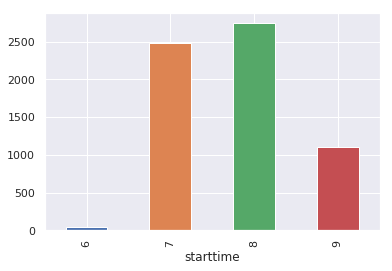

In [93]:
df.groupby(df["starttime"].dt.month).count()[0].plot(kind="bar", label = False)

In [94]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration
0,"{""deals"":[{""deal"":{""id"":""4820""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,0.000100,0.000,4820,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,2018-08-22 20:57:55,2018-08-22 21:01:37,00:03:42
1,"{""deal"":{""id"":""1065""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,2,8513388544,...,"""consumerCertificates"":""W10=""}",0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.053870,53.259,1065,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-10 21:03:31,2018-07-10 21:07:52,00:04:21
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45
3,"{""deal"":{""id"":""4823""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,0.000100,0.000,4823,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,2018-08-22 21:01:01,2018-08-22 21:04:31,00:03:30
4,"{""deal"":{""id"":""9""","""benchmarks"":{""values"":[1010",1293,2,2000000000,67108864,10000000,10000000,1,4288299008,...,"""consumerCertificates"":""W10=""}",0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x20bab6140Ec5fA53b5bEd974A1Ab99472b576163,0.015794,27.518,9,0xf5291bFDAA9324c42BEf942eCfC971EB95D56b33,2018-06-30 13:07:55,2018-06-30 13:12:55,00:05:00


In [95]:
(df['starttime'][0] - df['endtime'][0]).seconds/60

1436

In [96]:
df['duration'][0].total_seconds()

222.0

In [97]:
def convert_duration_to_minutes(content):
    return content.total_seconds()/60

In [98]:
convert_duration_to_minutes(df['duration'][0])

3.7

In [99]:
df['duration_minutes']= df['duration'].apply(convert_duration_to_minutes)

In [100]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
0,"{""deals"":[{""deal"":{""id"":""4820""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,0.000100,0.000,4820,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,2018-08-22 20:57:55,2018-08-22 21:01:37,00:03:42,3.70
1,"{""deal"":{""id"":""1065""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,2,8513388544,...,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.053870,53.259,1065,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-10 21:03:31,2018-07-10 21:07:52,00:04:21,4.35
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45,198.75
3,"{""deal"":{""id"":""4823""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,0.000100,0.000,4823,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,2018-08-22 21:01:01,2018-08-22 21:04:31,00:03:30,3.50
4,"{""deal"":{""id"":""9""","""benchmarks"":{""values"":[1010",1293,2,2000000000,67108864,10000000,10000000,1,4288299008,...,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x20bab6140Ec5fA53b5bEd974A1Ab99472b576163,0.015794,27.518,9,0xf5291bFDAA9324c42BEf942eCfC971EB95D56b33,2018-06-30 13:07:55,2018-06-30 13:12:55,00:05:00,5.00


# master_ID historical duration based

In [112]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
0,"{""deals"":[{""deal"":{""id"":""4820""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,0.000100,0.000,4820,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,2018-08-22 20:57:55,2018-08-22 21:01:37,00:03:42,3.70
1,"{""deal"":{""id"":""1065""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,2,8513388544,...,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.053870,53.259,1065,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-10 21:03:31,2018-07-10 21:07:52,00:04:21,4.35
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45,198.75
3,"{""deal"":{""id"":""4823""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,0.000100,0.000,4823,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,2018-08-22 21:01:01,2018-08-22 21:04:31,00:03:30,3.50
4,"{""deal"":{""id"":""9""","""benchmarks"":{""values"":[1010",1293,2,2000000000,67108864,10000000,10000000,1,4288299008,...,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x20bab6140Ec5fA53b5bEd974A1Ab99472b576163,0.015794,27.518,9,0xf5291bFDAA9324c42BEf942eCfC971EB95D56b33,2018-06-30 13:07:55,2018-06-30 13:12:55,00:05:00,5.00


In [113]:
df.sort_values('duration_minutes', ascending= False)[['duration','consumer_ID','master_ID',  'price_USD/h','Ethash']].head(10)

,duration,consumer_ID,master_ID,price_USD/h,Ethash
1942,61 days 04:05:35.722738,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,0.00000,0.0
6199,61 days 03:56:21.808619,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0xED629b767Ff4894E38a5a15c1F7233edBdFb6A32,0.00000,0.0
6191,57 days 12:42:27.807912,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.00000,0.0
5787,30 days 03:24:09.708513,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.00010,0.0
5437,30 days 03:23:39.618217,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.00010,0.0
4905,30 days 03:10:15.482715,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.00001,0.0
5795,30 days 02:53:36.713732,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.00001,0.0
6087,30 days 02:51:39.779924,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.00001,0.0
5933,24 days 12:30:26.746322,0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11,0x3C63D359D86E6165a2eBe911caA822d90e85432C,0.00000,0.0
5889,22 days 11:20:44.738248,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,0.01000,0.0


In [114]:
df.groupby('master_ID').describe()

Ethash                            \
                                             count        mean           std   
master_ID                                                                      
0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a     2.0   48.841000  0.000000e+00   
0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3     2.0   43.452000  0.000000e+00   
0x0bF957203A68367c344c7B6b60729Fc8354915ef     1.0    0.000000           NaN   
0x12d5e94d46B65df250B43d426777462e66226F0f    50.0  159.800000  0.000000e+00   
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE    80.0  176.959538  6.710275e+01   
0x197B93384DE6572D9c282C44D45588B0e902C266    43.0   16.082442  2.222325e-01   
0x1a13173445903d59B1567378989590e6b15A16B7    10.0   16.246000  3.744889e-15   
0x1bC66B0374C997cF9CB087Ef184975f174c053b5     2.0    0.000000  0.000000e+00   
0x2031851e4d38A850A6A3527597d53D66928332a7    17.0    0.000000  0.000000e+00   
0x21dd5b54664222AbD2E0F43efbDc9F3C592874f1    19.0   13.253000  1.825033e-15   
0x22E00835bD4b84456Ab3aA5E61a7FF07AB57b4A8     1.0   24.722000           NaN   
0x22d709876F24Da89933008Cd714A1CB3B29090eE    27.0    0.000000  0.000000e+00   
0x24E192b02d33501f225580d6B19A8d97C5190D45    41.0   17.353463  1.584721e+01   
0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4    67.0  133.448657  4.918008e+01   
0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3   463.0   50.301309  2.753134e+01   
0x25158E6f8dD683d222E3785BA2294A319489084E    66.0   39.297727  3.872055e+01   
0x257308430e87b7E45816Bda27DC76cbF739fCD30    60.0   40.177583  2.904106e+01   
0x25cAAc2BEB705b091A57D50d0297f0Daecb8A4D2    45.0    0.000000  0.000000e+00   
0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f    46.0   16.909109  8.440849e+00   
0x29E86F84A2D550deA9976d2a0198eBdD4BAB006b     1.0    0.000000           NaN   
0x2c743F2731c5803A649695930DD09a82Bba2B9c6     4.0    0.000000  0.000000e+00   
0x2ff5E25E63294728F2D0B10bAA36223E6D98702C     1.0   53.175000           NaN   
0x35f286b2472A99Eb011ff349b2b33f6f497Ca693    12.0  104.307167  5.290492e+01   
0x3C63D359D86E6165a2eBe911caA822d90e85432C     1.0    0.000000           NaN   
0x3D38C98eDDC026D8977767a30f8e8f6ec0405aBA     1.0    0.000000           NaN   
0x3acA407923bAaA8A609Ae6828A6A9dF822ee2026     1.0    0.000000           NaN   
0x402DF15486Be8baEe6162a1b8A03a10d82D86232    14.0    0.000000  0.000000e+00   
0x416Af57F633e292b25976573a460d7C3200feD34   290.0  140.036600  5.650205e+01   
0x424129085f9b7F0Cc07c47D077206d835a2A7B2b    62.0   27.677177  8.264190e+00   
0x461a6357Aa4381d51965248244b38508c1acDaF8     2.0   24.815000  0.000000e+00   
...                                            ...         ...           ...   
0xF412cAADF8B33AdFFd8343066BFCc7B718f115F2    20.0    8.357400  4.186746e-02   
0xFc5Ed3751d48e4498F7556618D536ad124B131F7     7.0    0.000000  0.000000e+00   
0xFe388151D3d862f6A6178876eA5Cc4E5718F1957    91.0    1.171143  5.492108e+00   
0xa2b5595641f4CdDC55A4B2862Fb03BaE800222C0     1.0    0.000000           NaN   
0xa90f716CF6ed3Bb999FE735B4C845b8DAf49672F    22.0   41.296182  3.195160e+01   
0xaF8aDfD8fc6f5cb98C40046156D8fEb37Ab7f561    12.0    0.000000  0.000000e+00   
0xab6A4bFd3670c1221D0c7fdf4cF04EbcFd87dd25    17.0    0.000000  0.000000e+00   
0xb272F78Cb008CBe9102dA1202c4349A80468AdD4     1.0    0.000000           NaN   
0xb3A8866183ca88ED3c233337C4f85045a2aD7d1F     1.0   27.459000           NaN   
0xb5c46741B45317bFdF370D3d021a2515AC4fF998    12.0    0.000000  0.000000e+00   
0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d    18.0   21.711000  1.824089e+01   
0xbaCcB540c12bF3baaCD77beB161C31700022ED40     2.0    0.000000  0.000000e+00   
0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba    11.0    0.000000  0.000000e+00   
0xcBF471Deb96286f0bA09Fc98cA92Ee8c19fbd2e0     2.0    0.000000  0.000000e+00   
0xcE3B31E47c72ca2f5B043c150a357C20883336DF    26.0  114.901692  3.820893e+01   
0xd0ecfF77c5B50BAB4D865CB1254A14ddfA05A6F0     1.0   13.125000           NaN   
0xd44b2f0705E51ec2B4F3B5EE4b0961e5127fdF82  

In [115]:
df50 = df.groupby('master_ID').describe()

In [116]:
df51 = df50['duration_minutes'][['count','mean']]

In [117]:
df51.to_csv('master_ID.csv')

In [118]:
df52 = pd.read_csv('master_ID.csv')

In [119]:
df52.head()

,master_ID,count,mean
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,80.0,228.864375


In [120]:
df52['master_ID'][0]

'0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a'

In [121]:
df[df.master_ID == df52['master_ID'][3]]

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
302,"{""deal"":{""id"":""3619""","""benchmarks"":{""values"":[127",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.133979,159.8,3619,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 15:09:25,2018-08-15 17:46:19,02:36:54,156.900000
491,"{""deal"":{""id"":""3630""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3630,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 17:47:49,2018-08-15 17:48:19,00:00:30,0.500000
503,"{""deal"":{""id"":""3634""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3634,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 17:49:25,2018-08-15 17:50:16,00:00:51,0.850000
658,"{""deal"":{""id"":""3638""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3638,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 17:51:19,2018-08-15 17:52:19,00:01:00,1.000000
1015,"{""deal"":{""id"":""4185""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000000,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,4185,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-18 15:30:32,2018-08-18 15:32:26,00:01:54,1.900000
1248,"{""deal"":{""id"":""4189""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000000,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,4189,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-18 15:41:20,2018-08-18 15:43:11,00:01:51,1.850000
1278,"{""deal"":{""id"":""4188""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000000,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,4188,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-18 15:38:44,2018-08-18 15:40:35,00:01:51,1.850000
1297,"{""deal"":{""id"":""4186""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000000,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,4186,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-18 15:33:08,2018-08-18 15:34:59,00:01:51,1.850000
1300,"{""deal"":{""id"":""4187""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000000,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,4187,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-18 15:35:53,2018-08-18 15:37:41,00:01:48,1.800000
1302,"{""deal"":{""id"":""4184""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000000,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,4184,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-18 15:27:41,2018-08-18 15:29:44,00:02:03,2.050000


In [122]:
df[df.master_ID == df52['master_ID'][3]]['duration_minutes']<10

302     False
491      True
503      True
658      True
1015     True
1248     True
1278     True
1297     True
1300     True
1302     True
1400     True
1405     True
1412     True
1980    False
2005     True
2060     True
2084     True
2158     True
2167     True
2247     True
2375     True
2384     True
2500     True
2550     True
2625     True
2649     True
2778     True
2889     True
2996     True
3022    False
3038     True
3040     True
3058     True
3095     True
3118     True
3129     True
3149    False
3491     True
3505    False
3917    False
4117    False
4590    False
4670    False
4682     True
4683    False
4684     True
4685    False
4691     True
4693     True
4698     True
Name: duration_minutes, dtype: bool

In [123]:
df[df.master_ID == df52['master_ID'][3]][df[df.master_ID == df52['master_ID'][3]]['duration_minutes']<10]

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
491,"{""deal"":{""id"":""3630""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3630,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 17:47:49,2018-08-15 17:48:19,00:00:30,0.50
503,"{""deal"":{""id"":""3634""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3634,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 17:49:25,2018-08-15 17:50:16,00:00:51,0.85
658,"{""deal"":{""id"":""3638""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3638,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 17:51:19,2018-08-15 17:52:19,00:01:00,1.00
1015,"{""deal"":{""id"":""4185""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000000,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,4185,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-18 15:30:32,2018-08-18 15:32:26,00:01:54,1.90
1248,"{""deal"":{""id"":""4189""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000000,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,4189,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-18 15:41:20,2018-08-18 15:43:11,00:01:51,1.85
1278,"{""deal"":{""id"":""4188""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000000,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,4188,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-18 15:38:44,2018-08-18 15:40:35,00:01:51,1.85
1297,"{""deal"":{""id"":""4186""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000000,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,4186,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-18 15:33:08,2018-08-18 15:34:59,00:01:51,1.85
1300,"{""deal"":{""id"":""4187""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000000,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,4187,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-18 15:35:53,2018-08-18 15:37:41,00:01:48,1.80
1302,"{""deal"":{""id"":""4184""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000000,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,4184,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-18 15:27:41,2018-08-18 15:29:44,00:02:03,2.05
1400,"{""deal"":{""id"":""4190""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000000,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,4190,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-18 15:43:53,2018-08-18 15:45:44,00:01:51,1.85


In [124]:
len(df[df.master_ID == df52['master_ID'][3]][df[df.master_ID == df52['master_ID'][3]]['duration_minutes']<10])

39

In [125]:
def count_failed_deal(content):
    return len(df[df.master_ID == content][df[df.master_ID == content]['duration_minutes']<10])

In [126]:
count_failed_deal(df52['master_ID'][3])

39

In [127]:
df52['failed_deal_number']=df52['master_ID'].apply(count_failed_deal)

In [128]:
df52.head()

,master_ID,count,mean,failed_deal_number
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,80.0,228.864375,58


In [129]:
df52['failed_deal_percent']=df52['failed_deal_number']/df52['count']*100

In [130]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.0
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.0
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.0
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39,78.0
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,80.0,228.864375,58,72.5


In [131]:
df52.sort_values('failed_deal_percent', ascending = False)

,master_ID,count,mean,failed_deal_number,failed_deal_percent
102,0xcBF471Deb96286f0bA09Fc98cA92Ee8c19fbd2e0,2.0,6.850000,2,100.000000
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.000000
38,0x600C6ad88D973eC1E3F040E3E4166FA49b57700c,2.0,1.575000,2,100.000000
19,0x29E86F84A2D550deA9976d2a0198eBdD4BAB006b,1.0,1.050000,1,100.000000
54,0x7f1D9bD0a76fA3DfBB2759bb37d5fB29B28C376F,2.0,1.525000,2,100.000000
56,0x8125721C2413d99a33E351e1F6Bb4e56b6b633FD,1.0,0.000000,1,100.000000
24,0x3D38C98eDDC026D8977767a30f8e8f6ec0405aBA,1.0,7.100000,1,100.000000
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.000000
33,0x4ccba01943Cc51Ba70232C42cBb8bd358fcBe15e,7.0,6.442857,6,85.714286
89,0xF412cAADF8B33AdFFd8343066BFCc7B718f115F2,20.0,7.345000,17,85.000000


In [132]:
df52[df52['count']>10].sort_values('failed_deal_percent', ascending = False)[['master_ID','count','failed_deal_percent']]

,master_ID,count,failed_deal_percent
89,0xF412cAADF8B33AdFFd8343066BFCc7B718f115F2,20.0,85.000000
48,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,88.0,80.681818
5,0x197B93384DE6572D9c282C44D45588B0e902C266,43.0,79.069767
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,78.000000
16,0x257308430e87b7E45816Bda27DC76cbF739fCD30,60.0,76.666667
68,0x9Ca4Bb5206553ca12e073795f820C41379e5Cc6c,17.0,76.470588
83,0xE10FA93E690EaDC9cE29d1CF934A4337334413d2,189.0,74.074074
14,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,463.0,73.218143
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,80.0,72.500000
75,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,117.0,71.794872


In [133]:
df52[df52['count']>10].sort_values('failed_deal_percent')[['master_ID','count','failed_deal_percent']]

,master_ID,count,failed_deal_percent
94,0xaF8aDfD8fc6f5cb98C40046156D8fEb37Ab7f561,12.0,0.000000
8,0x2031851e4d38A850A6A3527597d53D66928332a7,17.0,5.882353
63,0x9115B03bA37AF450b21bc23b546Ff7666E30015D,44.0,13.636364
26,0x402DF15486Be8baEe6162a1b8A03a10d82D86232,14.0,14.285714
98,0xb5c46741B45317bFdF370D3d021a2515AC4fF998,12.0,16.666667
118,0xfc29ED3d7E470c26cd34ff33B96bEFbC8228BF03,12.0,16.666667
101,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,11.0,18.181818
52,0x7610dd9944615263d9858101Dd197C90255DBa93,38.0,18.421053
59,0x87d341DF84A64b5289cf8A504F22cC10F509E9d6,13.0,23.076923
76,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,68.0,25.000000


In [134]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.0
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.0
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.0
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39,78.0
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,80.0,228.864375,58,72.5


In [135]:
df52['total_duration'] = df52['count']*df52['mean']

In [136]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.0,321.433333
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.0,11.500000
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.0,2.350000
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39,78.0,2948.366667
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,80.0,228.864375,58,72.5,18309.150000


In [137]:
df52.sort_values('total_duration', ascending = False)

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration
114,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,6.0,49964.303086,0,0.000000,299785.818517
110,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1556.0,162.625466,1040,66.838046,253045.224824
34,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,364.0,427.047076,180,49.450549,155445.135513
36,0x517648Ec2E592969Ec344642034F079c52AfD025,222.0,607.349361,91,40.990991,134831.558178
27,0x416Af57F633e292b25976573a460d7C3200feD34,290.0,399.107179,172,59.310345,115741.081973
7,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,2.0,44064.747689,0,0.000000,88129.495379
86,0xED629b767Ff4894E38a5a15c1F7233edBdFb6A32,1.0,88076.363477,0,0.000000,88076.363477
14,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,463.0,173.111699,339,73.218143,80150.716667
74,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,539.0,142.977427,313,58.070501,77064.833334
101,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,11.0,6310.650000,2,18.181818,69417.150000


In [138]:
df52.sort_values('total_duration', ascending = False).head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration
114,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,6.0,49964.303086,0,0.000000,299785.818517
110,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1556.0,162.625466,1040,66.838046,253045.224824
34,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,364.0,427.047076,180,49.450549,155445.135513
36,0x517648Ec2E592969Ec344642034F079c52AfD025,222.0,607.349361,91,40.990991,134831.558178
27,0x416Af57F633e292b25976573a460d7C3200feD34,290.0,399.107179,172,59.310345,115741.081973


In [139]:
df52.sort_values('total_duration', ascending = False)[['master_ID','count','total_duration','failed_deal_percent']]

,master_ID,count,total_duration,failed_deal_percent
114,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,6.0,299785.818517,0.000000
110,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1556.0,253045.224824,66.838046
34,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,364.0,155445.135513,49.450549
36,0x517648Ec2E592969Ec344642034F079c52AfD025,222.0,134831.558178,40.990991
27,0x416Af57F633e292b25976573a460d7C3200feD34,290.0,115741.081973,59.310345
7,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,2.0,88129.495379,0.000000
86,0xED629b767Ff4894E38a5a15c1F7233edBdFb6A32,1.0,88076.363477,0.000000
14,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,463.0,80150.716667,73.218143
74,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,539.0,77064.833334,58.070501
101,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,11.0,69417.150000,18.181818


In [140]:
len(df52)

119

In [141]:
df52.sort_values('count', ascending = False)[['master_ID','count','total_duration','failed_deal_percent']]

,master_ID,count,total_duration,failed_deal_percent
110,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1556.0,253045.224824,66.838046
74,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,539.0,77064.833334,58.070501
14,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,463.0,80150.716667,73.218143
82,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,367.0,53976.591180,69.482289
34,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,364.0,155445.135513,49.450549
27,0x416Af57F633e292b25976573a460d7C3200feD34,290.0,115741.081973,59.310345
36,0x517648Ec2E592969Ec344642034F079c52AfD025,222.0,134831.558178,40.990991
83,0xE10FA93E690EaDC9cE29d1CF934A4337334413d2,189.0,14389.966667,74.074074
45,0x6F6B9a47668D96b3758D79c67c30A290934a759F,163.0,47435.345641,59.509202
85,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,159.0,60701.391929,66.666667


In [142]:
df.groupby('master_ID').describe()['price_USD/h']['mean']

master_ID
0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a    0.046514
0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3    0.037993
0x0bF957203A68367c344c7B6b60729Fc8354915ef    0.700000
0x12d5e94d46B65df250B43d426777462e66226F0f    0.149177
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE    0.144170
0x197B93384DE6572D9c282C44D45588B0e902C266    0.015260
0x1a13173445903d59B1567378989590e6b15A16B7    0.019930
0x1bC66B0374C997cF9CB087Ef184975f174c053b5    0.015876
0x2031851e4d38A850A6A3527597d53D66928332a7    0.003067
0x21dd5b54664222AbD2E0F43efbDc9F3C592874f1    0.015314
0x22E00835bD4b84456Ab3aA5E61a7FF07AB57b4A8    0.029976
0x22d709876F24Da89933008Cd714A1CB3B29090eE    0.026889
0x24E192b02d33501f225580d6B19A8d97C5190D45    0.015576
0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4    0.128381
0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3    0.054443
0x25158E6f8dD683d222E3785BA2294A319489084E    0.032749
0x257308430e87b7E45816Bda27DC76cbF739fCD30    0.025203
0x25cAAc2BEB705b091A57D50d0297f0Daecb8A4D2    0.003812


In [143]:
df52['mean_price_USD/h'] = df.groupby('master_ID').describe()['price_USD/h']['mean'].values

In [144]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration,mean_price_USD/h
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.0,321.433333,0.046514
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.0,11.500000,0.037993
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.0,2.350000,0.700000
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39,78.0,2948.366667,0.149177
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,80.0,228.864375,58,72.5,18309.150000,0.144170


In [145]:
df52['total_duration_h'] =  df52['total_duration']/60

In [146]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration,mean_price_USD/h,total_duration_h
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.0,321.433333,0.046514,5.357222
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.0,11.500000,0.037993,0.191667
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.0,2.350000,0.700000,0.039167
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39,78.0,2948.366667,0.149177,49.139444
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,80.0,228.864375,58,72.5,18309.150000,0.144170,305.152500


In [147]:
df52['total_revenue_USD'] = df52['total_duration_h']*df52['mean_price_USD/h']

In [148]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration,mean_price_USD/h,total_duration_h,total_revenue_USD
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.0,321.433333,0.046514,5.357222,0.249187
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.0,11.500000,0.037993,0.191667,0.007282
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.0,2.350000,0.700000,0.039167,0.027417
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39,78.0,2948.366667,0.149177,49.139444,7.330452
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,80.0,228.864375,58,72.5,18309.150000,0.144170,305.152500,43.993787


In [149]:
df52.sort_values('total_revenue_USD', ascending = False)

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration,mean_price_USD/h,total_duration_h,total_revenue_USD
110,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1556.0,162.625466,1040,66.838046,253045.224824,0.086815,4217.420414,366.133419
27,0x416Af57F633e292b25976573a460d7C3200feD34,290.0,399.107179,172,59.310345,115741.081973,0.113164,1929.018033,218.294545
36,0x517648Ec2E592969Ec344642034F079c52AfD025,222.0,607.349361,91,40.990991,134831.558178,0.052897,2247.192636,118.869411
76,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,68.0,819.684314,17,25.000000,55738.533333,0.103307,928.975556,95.969972
85,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,159.0,381.769761,106,66.666667,60701.391929,0.093692,1011.689865,94.786763
82,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,367.0,147.075180,255,69.482289,53976.591180,0.097856,899.609853,88.032151
34,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,364.0,427.047076,180,49.450549,155445.135513,0.030222,2590.752259,78.298077
103,0xcE3B31E47c72ca2f5B043c150a357C20883336DF,26.0,1299.180769,8,30.769231,33778.700000,0.136273,562.978333,76.718810
14,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,463.0,173.111699,339,73.218143,80150.716667,0.054443,1335.845278,72.727468
109,0xe7517190DB97Ea55E985abdA33745AfC41a83592,39.0,540.377778,21,53.846154,21074.733333,0.128210,351.245556,45.033283


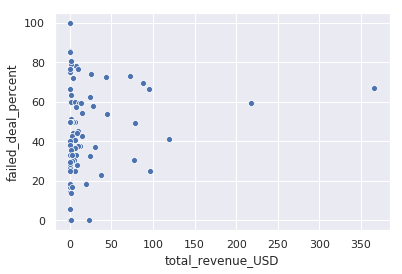

In [150]:
sns.scatterplot(data = df52, x = 'total_revenue_USD', y = 'failed_deal_percent')

In [151]:
df52.sort_values('total_revenue_USD', ascending = False).head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration,mean_price_USD/h,total_duration_h,total_revenue_USD
110,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1556.0,162.625466,1040,66.838046,253045.224824,0.086815,4217.420414,366.133419
27,0x416Af57F633e292b25976573a460d7C3200feD34,290.0,399.107179,172,59.310345,115741.081973,0.113164,1929.018033,218.294545
36,0x517648Ec2E592969Ec344642034F079c52AfD025,222.0,607.349361,91,40.990991,134831.558178,0.052897,2247.192636,118.869411
76,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,68.0,819.684314,17,25.000000,55738.533333,0.103307,928.975556,95.969972
85,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,159.0,381.769761,106,66.666667,60701.391929,0.093692,1011.689865,94.786763


In [152]:
df52.sort_values('total_revenue_USD', ascending = False)[['master_ID','count','total_duration_h','failed_deal_percent','total_revenue_USD']]

,master_ID,count,total_duration_h,failed_deal_percent,total_revenue_USD
110,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1556.0,4217.420414,66.838046,366.133419
27,0x416Af57F633e292b25976573a460d7C3200feD34,290.0,1929.018033,59.310345,218.294545
36,0x517648Ec2E592969Ec344642034F079c52AfD025,222.0,2247.192636,40.990991,118.869411
76,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,68.0,928.975556,25.000000,95.969972
85,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,159.0,1011.689865,66.666667,94.786763
82,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,367.0,899.609853,69.482289,88.032151
34,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,364.0,2590.752259,49.450549,78.298077
103,0xcE3B31E47c72ca2f5B043c150a357C20883336DF,26.0,562.978333,30.769231,76.718810
14,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,463.0,1335.845278,73.218143,72.727468
109,0xe7517190DB97Ea55E985abdA33745AfC41a83592,39.0,351.245556,53.846154,45.033283


In [153]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration,mean_price_USD/h,total_duration_h,total_revenue_USD
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.0,321.433333,0.046514,5.357222,0.249187
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.0,11.500000,0.037993,0.191667,0.007282
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.0,2.350000,0.700000,0.039167,0.027417
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39,78.0,2948.366667,0.149177,49.139444,7.330452
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,80.0,228.864375,58,72.5,18309.150000,0.144170,305.152500,43.993787


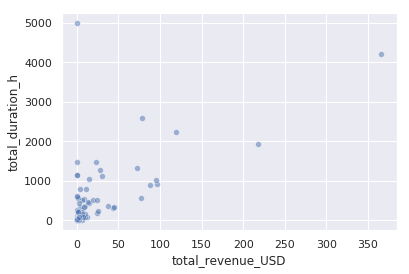

In [154]:
sns.scatterplot(data = df52, x = 'total_revenue_USD', y = 'total_duration_h', alpha = 0.5)

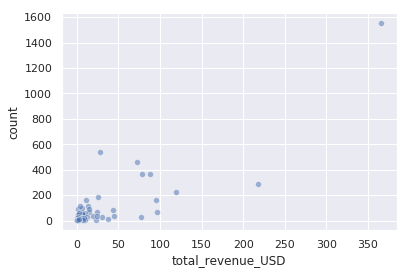

In [155]:
sns.scatterplot(data = df52, x = 'total_revenue_USD', y = 'count', alpha = 0.5)

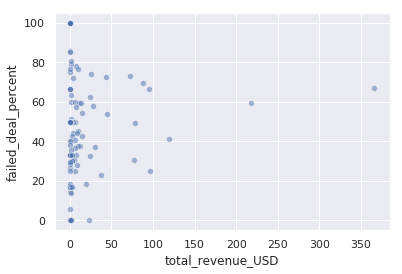

In [156]:
sns.scatterplot(data = df52, x = 'total_revenue_USD', y = 'failed_deal_percent', alpha = 0.5)

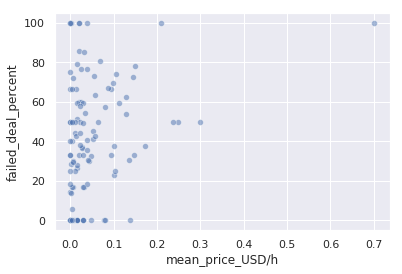

In [157]:
sns.scatterplot(data = df52, x = 'mean_price_USD/h', y = 'failed_deal_percent', alpha = 0.5)

## top suppliers best customers

In [158]:
df52 = df52.sort_values('total_revenue_USD', ascending = False)

In [159]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration,mean_price_USD/h,total_duration_h,total_revenue_USD
110,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1556.0,162.625466,1040,66.838046,253045.224824,0.086815,4217.420414,366.133419
27,0x416Af57F633e292b25976573a460d7C3200feD34,290.0,399.107179,172,59.310345,115741.081973,0.113164,1929.018033,218.294545
36,0x517648Ec2E592969Ec344642034F079c52AfD025,222.0,607.349361,91,40.990991,134831.558178,0.052897,2247.192636,118.869411
76,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,68.0,819.684314,17,25.000000,55738.533333,0.103307,928.975556,95.969972
85,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,159.0,381.769761,106,66.666667,60701.391929,0.093692,1011.689865,94.786763


In [160]:
df[df.master_ID == '0xedB7Ae4B946Cf249349974A02e354B5FBC577798'].groupby('consumer_ID').describe()['price_USD/h'].sort_values('count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
consumer_ID,,,,,,,,
0x417c92FbD944b125A578848DE44a4FD9132E0911,647.0,0.133348,0.099358,1.177317e-02,0.046418,0.107819,0.207845,0.344764
0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,601.0,0.044064,0.016989,0.000000e+00,0.038397,0.053870,0.053870,0.069526
0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,81.0,0.109880,0.098786,1.440000e-14,0.040000,0.052635,0.204600,0.430000
0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,39.0,0.003308,0.001962,1.000000e-03,0.001000,0.005000,0.005000,0.005000
0xedB7Ae4B946Cf249349974A02e354B5FBC577798,34.0,0.074826,0.048637,0.000000e+00,0.040000,0.057043,0.100000,0.150000
0xC55339c316ab31276A0a1489E2C4ecD9c19CBdfb,33.0,0.037504,0.011244,1.972234e-02,0.034320,0.037486,0.049521,0.049521
0xE8C01385bb6443AF00A42A91aef3b98b2445Fdad,28.0,0.057084,0.001316,5.364863e-02,0.057354,0.057386,0.057399,0.060100
0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,18.0,0.154444,0.046301,4.000000e-02,0.125000,0.170000,0.195000,0.200000
0xbAB383464dC6732b7E36EbCAA909ED0192faFaBb,17.0,0.046989,0.015754,3.882064e-02,0.040000,0.040000,0.040000,0.080000


In [161]:
df_B7 = df[df.master_ID == '0xedB7Ae4B946Cf249349974A02e354B5FBC577798'].groupby('consumer_ID').describe()['price_USD/h'].sort_values('count', ascending = False)

In [162]:
df_B7.to_csv('B7.csv')

In [163]:
dfB7 = pd.read_csv('B7.csv')

In [164]:
dfB7.head()

,consumer_ID,count,mean,std,min,25%,50%,75%,max
0,0x417c92FbD944b125A578848DE44a4FD9132E0911,647.0,0.133348,0.099358,1.177317e-02,0.046418,0.107819,0.207845,0.344764
1,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,601.0,0.044064,0.016989,0.000000e+00,0.038397,0.053870,0.053870,0.069526
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,81.0,0.109880,0.098786,1.440000e-14,0.040000,0.052635,0.204600,0.430000
3,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,39.0,0.003308,0.001962,1.000000e-03,0.001000,0.005000,0.005000,0.005000
4,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,34.0,0.074826,0.048637,0.000000e+00,0.040000,0.057043,0.100000,0.150000


In [165]:
df[df.master_ID == '0xedB7Ae4B946Cf249349974A02e354B5FBC577798'].groupby('consumer_ID').describe()['duration_minutes']['mean']

consumer_ID
0x1124fCC307756f4077c5e8E09b948C1CA7123eC9      33.687937
0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb     617.567078
0x1a13173445903d59B1567378989590e6b15A16B7     846.071429
0x417c92FbD944b125A578848DE44a4FD9132E0911      74.423248
0x47700c0f8c34a42BA88B35c9E67E5A925c7BF245       4.000000
0x517648Ec2E592969Ec344642034F079c52AfD025      57.225000
0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5      67.910000
0x7610dd9944615263d9858101Dd197C90255DBa93     255.450000
0x921DfF043950872280116dC949e675A5e1aC726D     107.950000
0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01      20.436111
0xC55339c316ab31276A0a1489E2C4ecD9c19CBdfb      69.513636
0xE75Bba413A645d0b6fB851b969fE033b478BC992    1821.550000
0xE8C01385bb6443AF00A42A91aef3b98b2445Fdad     285.978571
0xF044524c6A30bC7559DEa1CB21fA11b1f5817833    6735.816667
0xb4Eba44EE900A68b8B745eFCC34b4D8A80C2dB10      32.455000
0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d     879.514583
0xbAB383464dC6732b7E36EbCAA909ED0192faFaBb     526.911765
0x

In [166]:
dfB7['duration_minutes_mean'] = df[df.master_ID == '0xedB7Ae4B946Cf249349974A02e354B5FBC577798'].groupby('consumer_ID').describe()['duration_minutes']['mean'].values

In [167]:
dfB7['total_duration_minutes']=dfB7['count']*dfB7['duration_minutes_mean']

In [168]:
dfB7.head()

,consumer_ID,count,mean,std,min,25%,50%,75%,max,duration_minutes_mean,total_duration_minutes
0,0x417c92FbD944b125A578848DE44a4FD9132E0911,647.0,0.133348,0.099358,1.177317e-02,0.046418,0.107819,0.207845,0.344764,33.687937,21796.095092
1,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,601.0,0.044064,0.016989,0.000000e+00,0.038397,0.053870,0.053870,0.069526,617.567078,371157.813992
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,81.0,0.109880,0.098786,1.440000e-14,0.040000,0.052635,0.204600,0.430000,846.071429,68531.785714
3,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,39.0,0.003308,0.001962,1.000000e-03,0.001000,0.005000,0.005000,0.005000,74.423248,2902.506674
4,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,34.0,0.074826,0.048637,0.000000e+00,0.040000,0.057043,0.100000,0.150000,4.000000,136.000000


In [169]:
dfB7['total_expense_USD'] = dfB7['count']*dfB7['total_duration_minutes']/60

In [170]:
dfB7.head()

,consumer_ID,count,mean,std,min,25%,50%,75%,max,duration_minutes_mean,total_duration_minutes,total_expense_USD
0,0x417c92FbD944b125A578848DE44a4FD9132E0911,647.0,0.133348,0.099358,1.177317e-02,0.046418,0.107819,0.207845,0.344764,33.687937,21796.095092,2.350346e+05
1,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,601.0,0.044064,0.016989,0.000000e+00,0.038397,0.053870,0.053870,0.069526,617.567078,371157.813992,3.717764e+06
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,81.0,0.109880,0.098786,1.440000e-14,0.040000,0.052635,0.204600,0.430000,846.071429,68531.785714,9.251791e+04
3,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,39.0,0.003308,0.001962,1.000000e-03,0.001000,0.005000,0.005000,0.005000,74.423248,2902.506674,1.886629e+03
4,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,34.0,0.074826,0.048637,0.000000e+00,0.040000,0.057043,0.100000,0.150000,4.000000,136.000000,7.706667e+01


# Same analysis for consumers

In [171]:
df.groupby('consumer_ID').describe()

Ethash                         \
                                             count        mean        std   
consumer_ID                                                                 
0x0bF957203A68367c344c7B6b60729Fc8354915ef     2.0   19.474500  10.103849   
0x1124fCC307756f4077c5e8E09b948C1CA7123eC9  1341.0   42.384800  14.110975   
0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb   445.0   45.343110  58.568060   
0x1a13173445903d59B1567378989590e6b15A16B7    11.0   20.933455   4.189422   
0x201CDce452A3FE1a9baCfaD7f596429D36508f05     1.0    0.000000        NaN   
0x22d709876F24Da89933008Cd714A1CB3B29090eE     6.0    0.000000   0.000000   
0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4     2.0  172.350000   0.000000   
0x25158E6f8dD683d222E3785BA2294A319489084E     1.0   16.246000        NaN   
0x35f286b2472A99Eb011ff349b2b33f6f497Ca693     5.0  141.723000   0.000000   
0x384B08b25B4B78eb43969b2500999d1Ac3c82007    30.0   19.463167  43.891490   
0x4138Feb376d3a85ebD4E211fa8A7dAd081575494     1.0   53.251000        NaN   
0x417c92FbD944b125A578848DE44a4FD9132E0911  3036.0   89.031664  69.022479   
0x4567Da76D1c0239c21b33fa9aD767E9188108c0e     1.0    0.000000        NaN   
0x47700c0f8c34a42BA88B35c9E67E5A925c7BF245    23.0   27.677609  24.115005   
0x49f6C95B97C209F814c5b3B13428E91686a1FEd9    12.0    0.000000   0.000000   
0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA   213.0    0.000000   0.000000   
0x5139732b07cD630E13F852Dd92c4cA3DC625e7E9     1.0    0.000010        NaN   
0x517648Ec2E592969Ec344642034F079c52AfD025     5.0   75.670000   9.248377   
0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5   151.0   57.524285  54.797784   
0x63dA2009Ff928f99D960F48CBDd76C5a3E8591c4     2.0    9.720500  13.746863   
0x65A235FFf4F2c6344642c417cb4cE9fA698A5d2b     1.0    0.000000        NaN   
0x67588f2F50227F200B3dd6bd2Bf23076A27C18Ea     3.0    0.000000   0.000000   
0x6bdAc2AE57AA8325206bDD076e3022b12D64a4b6    16.0    0.000000   0.000000   
0x73208ae757b5a5747d79da4a08ba4FB3012ef0E8     5.0    0.000000   0.000000   
0x75CA26f23e0fC696af5Cb135b0ABfD53807691fE     1.0    0.000000        NaN   
0x75f554D5298c25C14De9D4BF12c6C1e19F9DB752     1.0    0.000000        NaN   
0x7610dd9944615263d9858101Dd197C90255DBa93   101.0    9.875525  33.853001   
0x77D216e0D9EDb9e99AC1c34152C52e7d9F799117    14.0   35.154286  13.154562   
0x87d341DF84A64b5289cf8A504F22cC10F509E9d6     2.0    0.000000   0.000000   
0x921DfF043950872280116dC949e675A5e1aC726D     5.0    5.589800   8.741249   
0x9da256F79Fa66Bb20626940e23590219a2b9746E     1.0    0.000000        NaN   
0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01    70.0   86.217414  71.785066   
0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE    55.0    0.000000   0.000000   
0xC0374AcF397563dBD8DeE433dd2d956729b9dBdA     6.0    0.000000   0.000000   
0xC55339c316ab31276A0a1489E2C4ecD9c19CBdfb    57.0   39.114404  14.116247   
0xCAF1d4F102Da3aa56CDCE3dAA4E5121EF72EFCD1     1.0    0.000000        NaN   
0xE75Bba413A645d0b6fB851b969fE033b478BC992     5.0   28.962200   3.195781   
0xE8C01385bb6443AF00A42A91aef3b98b2445Fdad    43.0   56.480186  23.809086   
0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F     7.0   93.352000  46.137366   
0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11     2.0    0.000000   0.000000   
0xF044524c6A30bC7559DEa1CB21fA11b1f5817833     6.0    0.000000   0.000000   
0xF722c6A22B38c087e9249afe6a2fd7635ffB154E     3.0    0.000000   0.000000   
0xFc5Ed3751d48e4498F7556618D536ad124B131F7     1.0   26.655000        NaN   
0xb4Eba44EE900A68b8B745eFCC34b4D8A80C2dB10    45.0   55.761578  30.581966   
0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d    16.0   35.745625  36.043541   
0xbAB383464dC6732b7E36EbCAA909ED0192faFaBb    30.0   28.676867  11.130898   
0xbaCcB540c12bF3baaCD77beB161C31700022ED40    21.0   19.689143  14.597532   
0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba   328.0    0.000000   0.000000   
0xd7eE275c57917cD2EeA621bfc0b1f80EA59381Ff     2.0    0.000000   0.000000   
0xe7517190DB97Ea55E985abdA33745AfC41a835

In [172]:
df61 = df.groupby('consumer_ID').describe()

In [173]:
df61['duration_minutes'][['count','mean']]

,count,mean
consumer_ID,,
0x0bF957203A68367c344c7B6b60729Fc8354915ef,2.0,190.025000
0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,41.938143
0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,445.0,1835.751801
0x1a13173445903d59B1567378989590e6b15A16B7,11.0,594.109091
0x201CDce452A3FE1a9baCfaD7f596429D36508f05,1.0,16220.609329
0x22d709876F24Da89933008Cd714A1CB3B29090eE,6.0,650.250000
0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4,2.0,0.725000
0x25158E6f8dD683d222E3785BA2294A319489084E,1.0,4.850000
0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,5.0,953.978203


In [174]:
df62 = df61['duration_minutes'][['count','mean']]

In [175]:
df62.to_csv('consumer.csv')

In [176]:
df62 = pd.read_csv('consumer.csv')

In [177]:
df62.head()

,consumer_ID,count,mean
0,0x0bF957203A68367c344c7B6b60729Fc8354915ef,2.0,190.025000
1,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,41.938143
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,445.0,1835.751801
3,0x1a13173445903d59B1567378989590e6b15A16B7,11.0,594.109091
4,0x201CDce452A3FE1a9baCfaD7f596429D36508f05,1.0,16220.609329


In [178]:
df62['total_duration_minute'] = df62['count']*df62['mean']

In [179]:
df62.head()

,consumer_ID,count,mean,total_duration_minute
0,0x0bF957203A68367c344c7B6b60729Fc8354915ef,2.0,190.025000,380.050000
1,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,41.938143,56239.050000
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,445.0,1835.751801,816909.551601
3,0x1a13173445903d59B1567378989590e6b15A16B7,11.0,594.109091,6535.200000
4,0x201CDce452A3FE1a9baCfaD7f596429D36508f05,1.0,16220.609329,16220.609329


In [180]:
df62['total_duration_h']=df62['total_duration_minute']/60

In [181]:
df62.head()

,consumer_ID,count,mean,total_duration_minute,total_duration_h
0,0x0bF957203A68367c344c7B6b60729Fc8354915ef,2.0,190.025000,380.050000,6.334167
1,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,41.938143,56239.050000,937.317500
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,445.0,1835.751801,816909.551601,13615.159193
3,0x1a13173445903d59B1567378989590e6b15A16B7,11.0,594.109091,6535.200000,108.920000
4,0x201CDce452A3FE1a9baCfaD7f596429D36508f05,1.0,16220.609329,16220.609329,270.343489


In [182]:
df62.sort_values('total_duration_h', ascending = False)

,consumer_ID,count,mean,total_duration_minute,total_duration_h
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,445.0,1835.751801,816909.551601,13615.159193
11,0x417c92FbD944b125A578848DE44a4FD9132E0911,3036.0,181.144261,549953.975015,9165.899584
14,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,12.0,24717.260193,296607.122321,4943.452039
47,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,328.0,648.198984,212609.266667,3543.487778
51,0xeFe1976D528FdeAC56E09115462dDedB26254BF7,89.0,1710.330822,152219.443152,2536.990719
1,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,41.938143,56239.050000,937.317500
52,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,79.0,585.428138,46248.822872,770.813715
15,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,213.0,182.605164,38894.900000,648.248333
49,0xe7517190DB97Ea55E985abdA33745AfC41a83592,54.0,675.284568,36465.366667,607.756111
32,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,55.0,656.488102,36106.845637,601.780761


In [183]:
df62.sort_values('total_duration_h', ascending = False).head()

,consumer_ID,count,mean,total_duration_minute,total_duration_h
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,445.0,1835.751801,816909.551601,13615.159193
11,0x417c92FbD944b125A578848DE44a4FD9132E0911,3036.0,181.144261,549953.975015,9165.899584
14,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,12.0,24717.260193,296607.122321,4943.452039
47,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,328.0,648.198984,212609.266667,3543.487778
51,0xeFe1976D528FdeAC56E09115462dDedB26254BF7,89.0,1710.330822,152219.443152,2536.990719


In [184]:
df62.sort_values('total_duration_h', ascending = False)[['consumer_ID','count','total_duration_h']]

,consumer_ID,count,total_duration_h
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,445.0,13615.159193
11,0x417c92FbD944b125A578848DE44a4FD9132E0911,3036.0,9165.899584
14,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,12.0,4943.452039
47,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,328.0,3543.487778
51,0xeFe1976D528FdeAC56E09115462dDedB26254BF7,89.0,2536.990719
1,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,937.317500
52,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,79.0,770.813715
15,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,213.0,648.248333
49,0xe7517190DB97Ea55E985abdA33745AfC41a83592,54.0,607.756111
32,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,55.0,601.780761


In [185]:
len(df62)

53

In [186]:
df62.sort_values('count', ascending = False)[['consumer_ID','count','total_duration_h']]

,consumer_ID,count,total_duration_h
11,0x417c92FbD944b125A578848DE44a4FD9132E0911,3036.0,9165.899584
1,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,937.317500
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,445.0,13615.159193
47,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,328.0,3543.487778
15,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,213.0,648.248333
18,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,151.0,172.176389
26,0x7610dd9944615263d9858101Dd197C90255DBa93,101.0,136.507500
51,0xeFe1976D528FdeAC56E09115462dDedB26254BF7,89.0,2536.990719
52,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,79.0,770.813715
31,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,70.0,579.733056


# Timestamp analysis

# new plots

In [187]:
import datetime
datetime.datetime.now()

datetime.datetime(2018, 9, 11, 20, 55, 49, 921898)

In [188]:
import pandas as pd
import numpy as np

In [189]:
pd.Timestamp.now()

Timestamp('2018-09-11 20:55:49.971042')

In [190]:
N = 1000
times = pd.date_range('2018-06', pd.Timestamp.now(), freq='H')
ind = np.random.permutation(np.arange(len(times)))[:N]

data = pd.DataFrame({'TIMESTAMP': times,
                     'TYPE': np.random.randint(0, 10, len(times))})
data.head()

,TIMESTAMP,TYPE
0,2018-06-01 00:00:00,5
1,2018-06-01 01:00:00,2
2,2018-06-01 02:00:00,1
3,2018-06-01 03:00:00,0
4,2018-06-01 04:00:00,1


In [191]:
len(data)

2469

In [192]:
data['TIMESTAMP'][2000]

Timestamp('2018-08-23 08:00:00')

In [193]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
0,"{""deals"":[{""deal"":{""id"":""4820""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,0.000100,0.000,4820,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,2018-08-22 20:57:55,2018-08-22 21:01:37,00:03:42,3.70
1,"{""deal"":{""id"":""1065""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,2,8513388544,...,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.053870,53.259,1065,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-10 21:03:31,2018-07-10 21:07:52,00:04:21,4.35
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45,198.75
3,"{""deal"":{""id"":""4823""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,0.000100,0.000,4823,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,2018-08-22 21:01:01,2018-08-22 21:04:31,00:03:30,3.50
4,"{""deal"":{""id"":""9""","""benchmarks"":{""values"":[1010",1293,2,2000000000,67108864,10000000,10000000,1,4288299008,...,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x20bab6140Ec5fA53b5bEd974A1Ab99472b576163,0.015794,27.518,9,0xf5291bFDAA9324c42BEf942eCfC971EB95D56b33,2018-06-30 13:07:55,2018-06-30 13:12:55,00:05:00,5.00


In [194]:
df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])]

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
931,"{""deal"":{""id"":""4881""","""benchmarks"":{""values"":[104",1062,4,512000000,67108864,1000000,1000000,1,8512339968,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x2f1B94E3813d66967a478031889F230D805130Ec,0.025210,30.105,4881,0x424129085f9b7F0Cc07c47D077206d835a2A7B2b,2018-08-23 06:39:40,2018-08-25 08:22:50.000000,2 days 01:43:10,2983.166667
1759,"{""deal"":{""id"":""4623""","""benchmarks"":{""values"":[117",1380,48,256000001,67108864,1000000,1000000,4,11720982528,...,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,0.141309,129.860,4623,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,2018-08-20 20:50:37,2018-08-27 20:57:50.000000,7 days 00:07:13,10087.216667
1942,"{""deal"":{""id"":""1394""","""benchmarks"":{""values"":[103",905,72,4194304,67108864,1200,1000,0,0,...,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0xC3C8b2915f62956066eD5C8719814e276A7B8C00,0.000000,0.000,1394,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,2018-07-12 16:49:22,2018-09-11 20:54:57.722738,61 days 04:05:35.722738,88085.595379
2930,"{""deal"":{""id"":""4648""","""benchmarks"":{""values"":[108",998,2,256000000,67108864,1000000,1000002,4,4213383168,...,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x37d7Ae51C3421474709331898B278D8bAB66eCac,0.080092,85.636,4648,0xd44b2f0705E51ec2B4F3B5EE4b0961e5127fdF82,2018-08-21 01:32:04,2018-08-23 18:51:43.000000,2 days 17:19:39,3919.650000
2995,"{""deal"":{""id"":""4711""","""benchmarks"":{""values"":[116",1300,2,512000000,67108864,1000001,1000000,6,8511291392,...,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,0.162238,159.643,4711,0x416Af57F633e292b25976573a460d7C3200feD34,2018-08-21 23:55:16,2018-08-25 13:08:20.000000,3 days 13:13:04,5113.066667
2997,"{""deal"":{""id"":""4710""","""benchmarks"":{""values"":[118",1300,2,256000000,67108864,1000000,1000000,7,8513388544,...,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x672Ee945a55327328472B1a02437293945157f4C,0.186366,186.411,4710,0x416Af57F633e292b25976573a460d7C3200feD34,2018-08-21 23:51:25,2018-08-25 13:09:05.000000,3 days 13:17:40,5117.666667
3060,"{""deal"":{""id"":""4878""","""benchmarks"":{""values"":[104",1949,16,512000000,67108864,1000001,1000000,1,6373244928,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xA0885038D127f628B3DC7f406004dE104d0bF496,0.017390,19.827,4878,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,2018-08-23 06:28:28,2018-08-23 08:42:37.000000,0 days 02:14:09,134.150000
3065,"{""deal"":{""id"":""4837""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,8513388544,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.023186,26.663,4837,0x517648Ec2E592969Ec344642034F079c52AfD025,2018-08-22 21:15:43,2018-08-26 04:13:29.000000,3 days 06:57:46,4737.766667
3117,"{""deal"":{""id"":""4883""","""benchmarks"":{""values"":[103",1288,2,512000000,67108864,1000000,1000000,6,8152825856,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x7C339f2cfeeDFDB1748a15E466F6bbC49770B48A,0.147143,165.157,4883,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,2018-08-23 07:58:52,2018-08-23 08:25:10.000000,0 days 00:26:18,26.300000
3128,"{""deal"":{""id"":""4652""","""benchmarks"":{""values"":[102",778,2,256000000,67108864,1000000,1000000,1,11720982528,...,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x47012859fC5cB44d6106D54ff77580c85C380ecc,0.020609,22.179,4652,0x25158E6f8dD683d222E3785BA2294A319489084E,2018-08-21 01:38:55,2018-08-23 08:27:55.000000,2 days 06:49:00,3289.000000


In [195]:
len(df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])])

35

In [196]:
def calclate_active_deals(time_stamp):
    return len(df[(df.starttime<time_stamp) & (df.endtime>time_stamp)])

In [197]:
calclate_active_deals(data['TIMESTAMP'][2000])

35

In [198]:
data['active_deal_number'] = data['TIMESTAMP'].apply(calclate_active_deals)

In [199]:
data.head()

,TIMESTAMP,TYPE,active_deal_number
0,2018-06-01 00:00:00,5,0
1,2018-06-01 01:00:00,2,0
2,2018-06-01 02:00:00,1,0
3,2018-06-01 03:00:00,0,0
4,2018-06-01 04:00:00,1,0


In [200]:
data[['TIMESTAMP', 'active_deal_number']]

,TIMESTAMP,active_deal_number
0,2018-06-01 00:00:00,0
1,2018-06-01 01:00:00,0
2,2018-06-01 02:00:00,0
3,2018-06-01 03:00:00,0
4,2018-06-01 04:00:00,0
5,2018-06-01 05:00:00,0
6,2018-06-01 06:00:00,0
7,2018-06-01 07:00:00,0
8,2018-06-01 08:00:00,0
9,2018-06-01 09:00:00,0


In [201]:
data2 = data.set_index('TIMESTAMP')

In [202]:
data

,TIMESTAMP,TYPE,active_deal_number
0,2018-06-01 00:00:00,5,0
1,2018-06-01 01:00:00,2,0
2,2018-06-01 02:00:00,1,0
3,2018-06-01 03:00:00,0,0
4,2018-06-01 04:00:00,1,0
5,2018-06-01 05:00:00,8,0
6,2018-06-01 06:00:00,3,0
7,2018-06-01 07:00:00,7,0
8,2018-06-01 08:00:00,9,0
9,2018-06-01 09:00:00,2,0


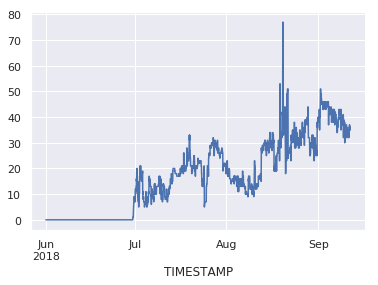

In [203]:
data2['active_deal_number'].plot()

In [204]:
df_connor = df[df.consumer_ID == "0x417c92FbD944b125A578848DE44a4FD9132E0911"]

In [205]:
df_connor.head()

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
15,"{""deal"":{""id"":""3620""","""benchmarks"":{""values"":[108",1397,48,256000001,67108864,1000001,1000000,4,11720982528,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xfb2c6c866e1022C94377Dc4f31E1aa867198425C,0.121309,129.853,3620,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,2018-08-15 15:35:34,2018-08-15 15:41:07,00:05:33,5.550000
25,"{""deal"":{""id"":""2555""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,9,3163553792,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.292659,199.600,2555,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-30 13:56:01,2018-07-30 14:07:20,00:11:19,11.316667
32,"{""deal"":{""id"":""2431""","""benchmarks"":{""values"":[106",1175,2,256000000,67108864,1000000,1000000,1,3165650944,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.016881,15.669,2431,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-27 19:23:43,2018-07-27 19:25:28,00:01:45,1.750000
40,"{""deal"":{""id"":""2290""","""benchmarks"":{""values"":[114",1528,4,256000000,67108864,1000000,1000000,1,11718885376,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.046580,32.456,2290,0x517648Ec2E592969Ec344642034F079c52AfD025,2018-07-26 22:46:40,2018-07-26 22:51:49,00:05:09,5.150000
44,"{""deal"":{""id"":""2548""","""benchmarks"":{""values"":[104",1736,4,256000000,67108864,1000000,1000000,4,8513388544,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x7998FC2Fa5f3c0B55301D1d905F276B1c803BAf2,0.123534,84.833,2548,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,2018-07-30 11:50:10,2018-07-30 14:18:44,02:28:34,148.566667


In [206]:
def calclate_connor_deals(time_stamp):
    return len(df_connor[(df_connor.starttime<time_stamp) & (df_connor.endtime>time_stamp)])

In [207]:
data['connor_deal_number'] = data['TIMESTAMP'].apply(calclate_connor_deals)

In [208]:
data2 = data.set_index('TIMESTAMP')

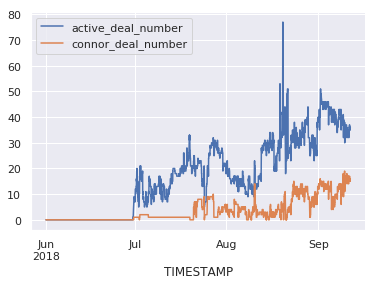

In [209]:
data2[['active_deal_number','connor_deal_number']].plot()

# calculate failed deal distribution

In [210]:
data.head()

,TIMESTAMP,TYPE,active_deal_number,connor_deal_number
0,2018-06-01 00:00:00,5,0,0
1,2018-06-01 01:00:00,2,0,0
2,2018-06-01 02:00:00,1,0,0
3,2018-06-01 03:00:00,0,0,0
4,2018-06-01 04:00:00,1,0,0


In [211]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
0,"{""deals"":[{""deal"":{""id"":""4820""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,0.000100,0.000,4820,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,2018-08-22 20:57:55,2018-08-22 21:01:37,00:03:42,3.70
1,"{""deal"":{""id"":""1065""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,2,8513388544,...,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.053870,53.259,1065,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-10 21:03:31,2018-07-10 21:07:52,00:04:21,4.35
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45,198.75
3,"{""deal"":{""id"":""4823""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,0.000100,0.000,4823,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,2018-08-22 21:01:01,2018-08-22 21:04:31,00:03:30,3.50
4,"{""deal"":{""id"":""9""","""benchmarks"":{""values"":[1010",1293,2,2000000000,67108864,10000000,10000000,1,4288299008,...,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x20bab6140Ec5fA53b5bEd974A1Ab99472b576163,0.015794,27.518,9,0xf5291bFDAA9324c42BEf942eCfC971EB95D56b33,2018-06-30 13:07:55,2018-06-30 13:12:55,00:05:00,5.00


In [212]:
df_failed = df[df.duration_minutes <10]

In [213]:
df_successed = df[df.duration_minutes >10]

In [214]:
def calclate_failed_deals(time_stamp):
    return len(df_failed[(df_failed.starttime<time_stamp) & (df_failed.endtime>time_stamp)])

In [215]:
def calclate_successed_deals(time_stamp):
    return len(df_successed[(df_successed.starttime<time_stamp) & (df_successed.endtime>time_stamp)])

In [216]:
data['failed_deal_number'] = data['TIMESTAMP'].apply(calclate_failed_deals)

In [217]:
data['successed_deal_number'] = data['TIMESTAMP'].apply(calclate_successed_deals)

In [218]:
data2 = data.set_index('TIMESTAMP')

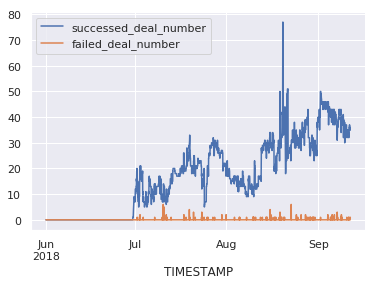

In [219]:
data2[['successed_deal_number','failed_deal_number']].plot()

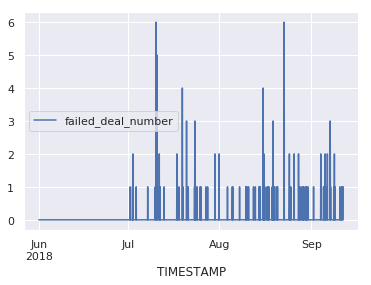

In [220]:
data2[['failed_deal_number']].plot()

# previously coded part

In [221]:
df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])].groupby('master_ID').describe()

Ethash                          \
                                            count        mean         std   
master_ID                                                                   
0x1bC66B0374C997cF9CB087Ef184975f174c053b5    1.0    0.000000         NaN   
0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4    1.0  172.350000         NaN   
0x25158E6f8dD683d222E3785BA2294A319489084E    1.0   22.179000         NaN   
0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f    1.0   12.220000         NaN   
0x3C63D359D86E6165a2eBe911caA822d90e85432C    1.0    0.000000         NaN   
0x416Af57F633e292b25976573a460d7C3200feD34    3.0  159.752333   26.604168   
0x424129085f9b7F0Cc07c47D077206d835a2A7B2b    1.0   30.105000         NaN   
0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA    3.0   26.442000   30.296063   
0x517648Ec2E592969Ec344642034F079c52AfD025    2.0   29.558500    4.094855   
0x61a2bB7A14177820F852afb95E3625b6A370079C    2.0    0.000000    0.000000   
0x6F6B9a47668D96b3758D79c67c30A290934a759F    1.0   19.778000         NaN   
0x87d341DF84A64b5289cf8A504F22cC10F509E9d6    1.0    0.000000         NaN   
0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01    1.0   21.959000         NaN   
0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE    1.0    0.000000         NaN   
0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD    1.0  165.157000         NaN   
0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F    1.0  129.860000         NaN   
0xED629b767Ff4894E38a5a15c1F7233edBdFb6A32    1.0    0.000000         NaN   
0xa90f716CF6ed3Bb999FE735B4C845b8DAf49672F    1.0   64.894000         NaN   
0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d    2.0   21.711000    0.005657   
0xd44b2f0705E51ec2B4F3B5EE4b0961e5127fdF82    1.0   85.636000         NaN   
0xedB7Ae4B946Cf249349974A02e354B5FBC577798    2.0  109.769500  155.237516   
0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3    6.0    0.000000    0.000000   

                                                                          \
                                                min        25%       50%   
master_ID                                                                  
0x1bC66B0374C997cF9CB087Ef184975f174c053b5    0.000    0.00000    0.0000   
0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4  172.350  172.35000  172.3500   
0x25158E6f8dD683d222E3785BA2294A319489084E   22.179   22.17900   22.1790   
0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f   12.220   12.22000   12.2200   
0x3C63D359D86E6165a2eBe911caA822d90e85432C    0.000    0.00000    0.0000   
0x416Af57F633e292b25976573a460d7C3200feD34  133.203  146.42300  159.6430   
0x424129085f9b7F0Cc07c47D077206d835a2A7B2b   30.105   30.10500   30.1050   
0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA    0.000    9.91350   19.8270   
0x517648Ec2E592969Ec344642034F079c52AfD025   26.663   28.11075   29.5585   
0x61a2bB7A14177820F852afb95E3625b6A370079C    0.000    0.00000    0.0000   
0x6F6B9a47668D96b3758D79c67c30A290934a759F   19.778   19.77800   19.7780   
0x87d341DF84A64b5289cf8A504F22cC10F509E9d6    0.000    0.00000    0.0000   
0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01   21.959   21.95900   21.9590   
0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE    0.000    0.00000    0.0000   
0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD  165.157  165.15700  165.1570   
0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F  129.860  129.86000  129.8600   
0xED629b767Ff4894E38a5a15c1F7233edBdFb6A32    0.000    0.00000    0.0000   
0xa90f716CF6ed3Bb999FE735B4C845b8DAf49672F   64.894   64.89400   64.8940   
0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d   21.707   21.70900   21.7110   
0xd44b2f0705E51ec2B4F3B5EE4b0961e5127fdF82   85.636   85.63600   85.6360   
0xedB7Ae4B946Cf249349974A02e354B5FBC577798    0.000   54.88475  109.7695   
0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3    0.000    0.00000    0.0000   

                                                               deal_ID  \
                                                  75%      max   count   
master_ID                                                           

In [222]:
len(df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])].groupby('master_ID').describe())

22

In [223]:
def calclate_unique_supplier(time_stamp):
    return len(df[(df.starttime<time_stamp) & (df.endtime>time_stamp)].groupby('master_ID').describe())

In [224]:
calclate_unique_supplier(data['TIMESTAMP'][2000])

22

In [225]:
data['supplier_number'] = data['TIMESTAMP'].apply(calclate_unique_supplier)

In [226]:
data2 = data.set_index('TIMESTAMP')

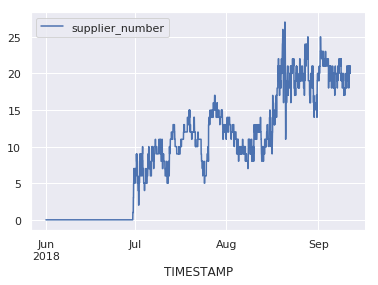

In [227]:
data2[['supplier_number']].plot()

In [228]:
def calclate_unique_consumer(time_stamp):
    return len(df[(df.starttime<time_stamp) & (df.endtime>time_stamp)].groupby('consumer_ID').describe())

In [229]:
data['consumerr_number'] = data['TIMESTAMP'].apply(calclate_unique_consumer)

In [230]:
data['consumer_number']= data['consumerr_number']

In [231]:
data2 = data.set_index('TIMESTAMP')

In [232]:
data2.head()

,TYPE,active_deal_number,connor_deal_number,failed_deal_number,successed_deal_number,supplier_number,consumerr_number,consumer_number
TIMESTAMP,,,,,,,,
2018-06-01 00:00:00,5,0,0,0,0,0,0,0
2018-06-01 01:00:00,2,0,0,0,0,0,0,0
2018-06-01 02:00:00,1,0,0,0,0,0,0,0
2018-06-01 03:00:00,0,0,0,0,0,0,0,0
2018-06-01 04:00:00,1,0,0,0,0,0,0,0


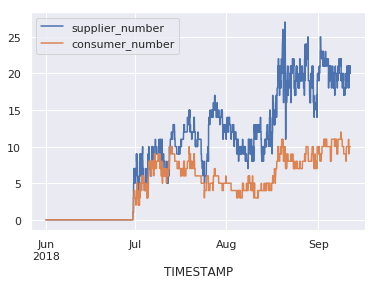

In [233]:
data2[['supplier_number','consumer_number']].plot()

In [234]:
df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])]['Ethash'].sum()

1604.799

In [235]:
def calclate_Ethash(time_stamp):
    return df[(df.starttime<time_stamp) & (df.endtime>time_stamp)]['Ethash'].sum()

In [236]:
data['total_Ethash'] = data['TIMESTAMP'].apply(calclate_Ethash)

In [237]:
data2 = data.set_index('TIMESTAMP')

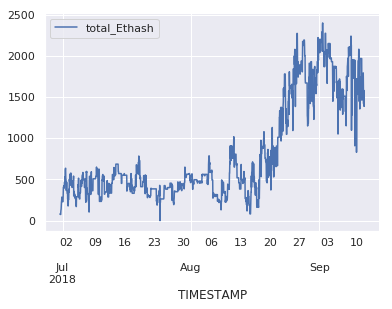

In [238]:
data2[['total_Ethash']].plot()

In [239]:
data['Ethash/deal'] = data['total_Ethash']/data['active_deal_number']

In [240]:
data2 = data.set_index('TIMESTAMP')

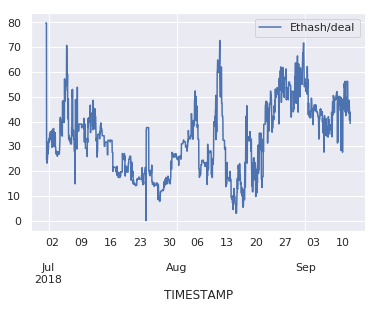

In [241]:
data2[['Ethash/deal']].plot()

In [242]:
data['Ethash/supplier'] = data['total_Ethash']/data['supplier_number']

In [243]:
data2 = data.set_index('TIMESTAMP')

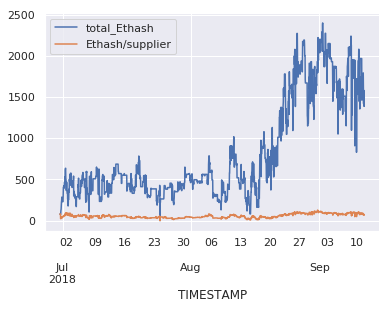

In [244]:
data2[['total_Ethash','Ethash/supplier']].plot()

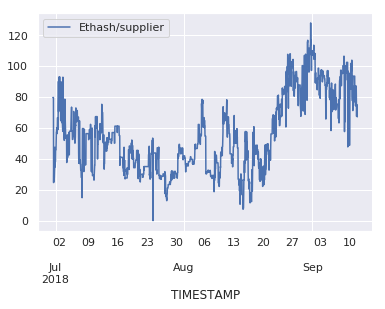

In [245]:
data2[['Ethash/supplier']].plot()

In [246]:
df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])]['duration_minutes'].mean()/60

314.05630259476192

In [247]:
df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])]['duration_minutes']

931      2983.166667
1759    10087.216667
1942    88085.595379
2930     3919.650000
2995     5113.066667
2997     5117.666667
3060      134.150000
3065     4737.766667
3117       26.300000
3128     3289.000000
3157      134.100000
3249      181.150000
3418     2422.900000
3453     4146.983333
3477     9974.900000
3493     1198.850000
3607      659.500000
4408     3549.416667
4668     4779.266667
4708     4694.116667
4712     3565.916667
4905    43390.258045
5157    13658.600000
5183    10051.166667
5214     2487.166667
5397     3919.300000
5437    43403.660304
5444    15067.950000
5787    43404.161809
5795    43373.611896
5889    32360.745637
5933    35310.445772
6087    43371.662999
6191    82842.463465
6199    88076.363477
Name: duration_minutes, dtype: float64

In [248]:
def mean_duration(timestamp):
    return df[(df.starttime<timestamp) & (df.endtime>timestamp)]['duration_minutes'].mean()/60
    

In [249]:
mean_duration(data['TIMESTAMP'][2000])

314.05630259476192

In [250]:
data['mean_duration_hour']=data['TIMESTAMP'].apply(mean_duration)

In [251]:
data2 = data.set_index('TIMESTAMP')

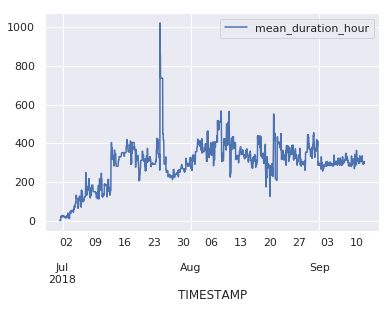

In [252]:
data2[['mean_duration_hour']].plot()

In [253]:
df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])]['duration_minutes']

931      2983.166667
1759    10087.216667
1942    88085.595379
2930     3919.650000
2995     5113.066667
2997     5117.666667
3060      134.150000
3065     4737.766667
3117       26.300000
3128     3289.000000
3157      134.100000
3249      181.150000
3418     2422.900000
3453     4146.983333
3477     9974.900000
3493     1198.850000
3607      659.500000
4408     3549.416667
4668     4779.266667
4708     4694.116667
4712     3565.916667
4905    43390.258045
5157    13658.600000
5183    10051.166667
5214     2487.166667
5397     3919.300000
5437    43403.660304
5444    15067.950000
5787    43404.161809
5795    43373.611896
5889    32360.745637
5933    35310.445772
6087    43371.662999
6191    82842.463465
6199    88076.363477
Name: duration_minutes, dtype: float64

# Connor time stamp and profitability

In [254]:
df_connor.head()

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
15,"{""deal"":{""id"":""3620""","""benchmarks"":{""values"":[108",1397,48,256000001,67108864,1000001,1000000,4,11720982528,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xfb2c6c866e1022C94377Dc4f31E1aa867198425C,0.121309,129.853,3620,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,2018-08-15 15:35:34,2018-08-15 15:41:07,00:05:33,5.550000
25,"{""deal"":{""id"":""2555""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,9,3163553792,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.292659,199.600,2555,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-30 13:56:01,2018-07-30 14:07:20,00:11:19,11.316667
32,"{""deal"":{""id"":""2431""","""benchmarks"":{""values"":[106",1175,2,256000000,67108864,1000000,1000000,1,3165650944,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.016881,15.669,2431,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-27 19:23:43,2018-07-27 19:25:28,00:01:45,1.750000
40,"{""deal"":{""id"":""2290""","""benchmarks"":{""values"":[114",1528,4,256000000,67108864,1000000,1000000,1,11718885376,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.046580,32.456,2290,0x517648Ec2E592969Ec344642034F079c52AfD025,2018-07-26 22:46:40,2018-07-26 22:51:49,00:05:09,5.150000
44,"{""deal"":{""id"":""2548""","""benchmarks"":{""values"":[104",1736,4,256000000,67108864,1000000,1000000,4,8513388544,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x7998FC2Fa5f3c0B55301D1d905F276B1c803BAf2,0.123534,84.833,2548,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,2018-07-30 11:50:10,2018-07-30 14:18:44,02:28:34,148.566667


In [255]:
df_connor[(df_connor.starttime<data['TIMESTAMP'][2000]) & (df_connor.endtime>data['TIMESTAMP'][2000])]

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
931,"{""deal"":{""id"":""4881""","""benchmarks"":{""values"":[104",1062,4,512000000,67108864,1000000,1000000,1,8512339968,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x2f1B94E3813d66967a478031889F230D805130Ec,0.025210,30.105,4881,0x424129085f9b7F0Cc07c47D077206d835a2A7B2b,2018-08-23 06:39:40,2018-08-25 08:22:50,2 days 01:43:10,2983.166667
3060,"{""deal"":{""id"":""4878""","""benchmarks"":{""values"":[104",1949,16,512000000,67108864,1000001,1000000,1,6373244928,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xA0885038D127f628B3DC7f406004dE104d0bF496,0.017390,19.827,4878,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,2018-08-23 06:28:28,2018-08-23 08:42:37,0 days 02:14:09,134.150000
3065,"{""deal"":{""id"":""4837""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,8513388544,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.023186,26.663,4837,0x517648Ec2E592969Ec344642034F079c52AfD025,2018-08-22 21:15:43,2018-08-26 04:13:29,3 days 06:57:46,4737.766667
3117,"{""deal"":{""id"":""4883""","""benchmarks"":{""values"":[103",1288,2,512000000,67108864,1000000,1000000,6,8152825856,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x7C339f2cfeeDFDB1748a15E466F6bbC49770B48A,0.147143,165.157,4883,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,2018-08-23 07:58:52,2018-08-23 08:25:10,0 days 00:26:18,26.300000
3157,"{""deal"":{""id"":""4879""","""benchmarks"":{""values"":[104",1949,16,512000000,67108864,1000001,1000000,3,6372196352,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xA0885038D127f628B3DC7f406004dE104d0bF496,0.050831,59.499,4879,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,2018-08-23 06:28:52,2018-08-23 08:42:58,0 days 02:14:06,134.100000
3607,"{""deal"":{""id"":""4875""","""benchmarks"":{""values"":[108",1094,2,512000000,67108864,1000000,1000000,6,8507097088,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x38B904701577720d4Eb06b5d28A7bd02a443711F,0.150264,172.350,4875,0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4,2018-08-23 04:07:49,2018-08-23 15:07:19,0 days 10:59:30,659.500000
4408,"{""deal"":{""id"":""4836""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,11718885376,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.028091,32.454,4836,0x517648Ec2E592969Ec344642034F079c52AfD025,2018-08-22 21:15:13,2018-08-25 08:24:38,2 days 11:09:25,3549.416667
4668,"{""deal"":{""id"":""4830""","""benchmarks"":{""values"":[109",1522,8,512000000,67108864,1000000,1000000,1,4292050944,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,0.018727,21.715,4830,0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d,2018-08-22 21:04:13,2018-08-26 04:43:29,3 days 07:39:16,4779.266667
4708,"{""deal"":{""id"":""4835""","""benchmarks"":{""values"":[108",1113,8,512000000,67108864,1000000,1000001,1,6368002048,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x734C2a165e57496169aAAEA6E22aE763fF8d7654,0.017390,19.778,4835,0x6F6B9a47668D96b3758D79c67c30A290934a759F,2018-08-22 21:09:25,2018-08-26 03:23:32,3 days 06:14:07,4694.116667
4712,"{""deal"":{""id"":""4818""","""benchmarks"":{""values"":[109",1522,8,512000000,67108864,1000000,1000000,1,4292050944,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,0.018727,21.707,4818,0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d,2018-08-22 20:57:13,2018-08-25 08:23:08,2 days 11:25:55,3565.916667


In [256]:
df_connor[(df_connor.starttime<data['TIMESTAMP'][2000]) & (df_connor.endtime>data['TIMESTAMP'][2000])]['Ethash'].sum()

702.45799999999997

In [257]:
df_connor[(df_connor.starttime<data['TIMESTAMP'][2000]) & (df_connor.endtime>data['TIMESTAMP'][2000])]['price_USD/h'].sum()

0.61288928999999992

In [258]:
df_connor[(df_connor.starttime<data['TIMESTAMP'][2000]) & (df_connor.endtime>data['TIMESTAMP'][2000])]['price_USD/h'].sum()/df_connor[(df_connor.starttime<data['TIMESTAMP'][2000]) & (df_connor.endtime>data['TIMESTAMP'][2000])]['Ethash'].sum()

0.0008724924337113393

In [259]:
def profitability(timestamp):
    ethash = df_connor[(df_connor.starttime<timestamp) & (df_connor.endtime>timestamp)]['Ethash'].sum()
    price = df_connor[(df_connor.starttime<timestamp) & (df_connor.endtime>timestamp)]['price_USD/h'].sum()
    return price/ethash

In [260]:
profitability(data['TIMESTAMP'][2000])

0.0008724924337113393

In [261]:
data['profitability USD/h per Mh/s']=data['TIMESTAMP'].apply(profitability)

In [262]:
data2 = data.set_index('TIMESTAMP')

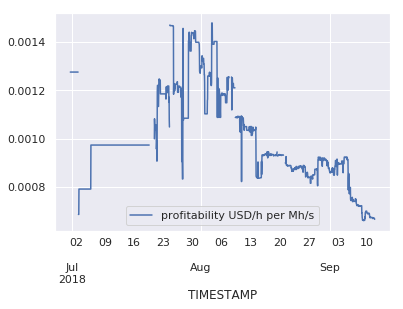

In [263]:
data2[['profitability USD/h per Mh/s']].plot()

In [264]:
data2.iloc[2000]

TYPE                               7.000000
active_deal_number                35.000000
connor_deal_number                11.000000
failed_deal_number                 0.000000
successed_deal_number             35.000000
supplier_number                   22.000000
consumerr_number                   9.000000
consumer_number                    9.000000
total_Ethash                    1604.799000
Ethash/deal                       45.851400
Ethash/supplier                   72.945409
mean_duration_hour               314.056303
profitability USD/h per Mh/s       0.000872
Name: 2018-08-23 08:00:00, dtype: float64

In [265]:
def profitability_total(timestamp):
    ethash = df[(df.starttime<timestamp) & (df.endtime>timestamp)]['Ethash'].sum()
    price = df[(df.starttime<timestamp) & (df.endtime>timestamp)]['price_USD/h'].sum()
    return price/ethash

In [266]:
data['total_profitability USD/h per Mh/s']=data['TIMESTAMP'].apply(profitability_total)

In [267]:
data2 = data.set_index('TIMESTAMP')

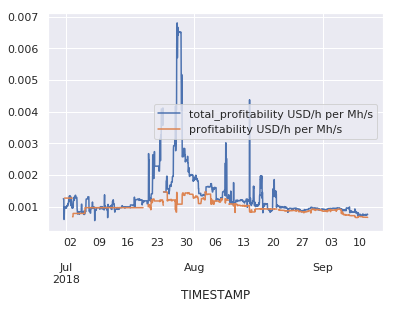

In [268]:
data2[['total_profitability USD/h per Mh/s','profitability USD/h per Mh/s']].plot()

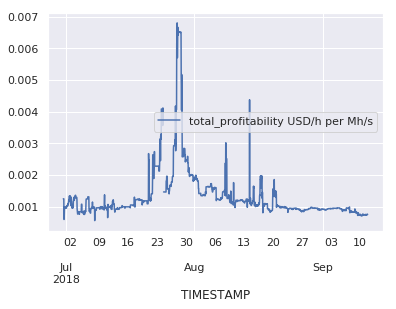

In [269]:
data2[['total_profitability USD/h per Mh/s']].plot()

In [270]:
data.tail()

,TIMESTAMP,TYPE,active_deal_number,connor_deal_number,failed_deal_number,successed_deal_number,supplier_number,consumerr_number,consumer_number,total_Ethash,Ethash/deal,Ethash/supplier,mean_duration_hour,profitability USD/h per Mh/s,total_profitability USD/h per Mh/s
2464,2018-09-11 16:00:00,1,35,15,0,35,21,10,10,1418.974,40.542114,67.570190,305.514181,0.000672,0.000765
2465,2018-09-11 17:00:00,5,36,16,0,36,21,10,10,1578.763,43.854528,75.179190,297.087005,0.000672,0.000756
2466,2018-09-11 18:00:00,0,36,16,0,36,21,10,10,1578.763,43.854528,75.179190,297.039362,0.000671,0.000755
2467,2018-09-11 19:00:00,8,35,15,0,35,20,10,10,1385.801,39.594314,69.290050,304.967288,0.000669,0.000765
2468,2018-09-11 20:00:00,9,36,16,1,35,21,10,10,1412.425,39.234028,67.258333,296.500071,0.000666,0.000761


# Consumers who left SONM

In [271]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
0,"{""deals"":[{""deal"":{""id"":""4820""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,0.000100,0.000,4820,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,2018-08-22 20:57:55,2018-08-22 21:01:37,00:03:42,3.70
1,"{""deal"":{""id"":""1065""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,2,8513388544,...,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.053870,53.259,1065,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-10 21:03:31,2018-07-10 21:07:52,00:04:21,4.35
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45,198.75
3,"{""deal"":{""id"":""4823""","""benchmarks"":{""values"":[9606",1380,48,100000000,67108864,120,500,0,0,...,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,0.000100,0.000,4823,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,2018-08-22 21:01:01,2018-08-22 21:04:31,00:03:30,3.50
4,"{""deal"":{""id"":""9""","""benchmarks"":{""values"":[1010",1293,2,2000000000,67108864,10000000,10000000,1,4288299008,...,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x20bab6140Ec5fA53b5bEd974A1Ab99472b576163,0.015794,27.518,9,0xf5291bFDAA9324c42BEf942eCfC971EB95D56b33,2018-06-30 13:07:55,2018-06-30 13:12:55,00:05:00,5.00


In [273]:
df.groupby('consumer_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
consumer_ID,,,,,,,,
0x0bF957203A68367c344c7B6b60729Fc8354915ef,2.0,19.474500,10.103849,12.33000,15.90225,19.47450,23.04675,26.61900
0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,42.384800,14.110975,12.33000,29.80000,46.57000,53.25900,79.88400
0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,445.0,45.343110,58.568060,0.00000,0.00000,22.17900,46.58900,219.54000
0x1a13173445903d59B1567378989590e6b15A16B7,11.0,20.933455,4.189422,15.62300,18.10500,19.96400,24.51350,26.63500
0x201CDce452A3FE1a9baCfaD7f596429D36508f05,1.0,0.000000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000
0x22d709876F24Da89933008Cd714A1CB3B29090eE,6.0,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4,2.0,172.350000,0.000000,172.35000,172.35000,172.35000,172.35000,172.35000
0x25158E6f8dD683d222E3785BA2294A319489084E,1.0,16.246000,NaN,16.24600,16.24600,16.24600,16.24600,16.24600
0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,5.0,141.723000,0.000000,141.72300,141.72300,141.72300,141.72300,141.72300


In [274]:
df_consumer = df.groupby('consumer_ID').describe()['Ethash']

In [275]:
df_consumer.to_csv('consumer.csv')

In [276]:
df_consumer = pd.read_csv('consumer.csv')

In [277]:
df_consumer.head()

,consumer_ID,count,mean,std,min,25%,50%,75%,max
0,0x0bF957203A68367c344c7B6b60729Fc8354915ef,2.0,19.474500,10.103849,12.330,15.90225,19.4745,23.04675,26.619
1,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,42.384800,14.110975,12.330,29.80000,46.5700,53.25900,79.884
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,445.0,45.343110,58.568060,0.000,0.00000,22.1790,46.58900,219.540
3,0x1a13173445903d59B1567378989590e6b15A16B7,11.0,20.933455,4.189422,15.623,18.10500,19.9640,24.51350,26.635
4,0x201CDce452A3FE1a9baCfaD7f596429D36508f05,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000


In [281]:
df_consumer['consumer_ID'][0]

'0x0bF957203A68367c344c7B6b60729Fc8354915ef'

In [284]:
df[df.consumer_ID== df_consumer['consumer_ID'][0]]['endtime'].max()

Timestamp('2018-07-04 05:08:13')

In [292]:
df[df.consumer_ID== df_consumer['consumer_ID'][0]]['endtime'].max() < pd.Timestamp(2018, 9, 1)

True

In [288]:
pd.Timestamp(2018, 9, 1, 12)

Timestamp('2018-09-01 12:00:00')

In [294]:
def supplier_left(ID):
    return df[df.consumer_ID == ID]['endtime'].max() < pd.Timestamp(2018, 9, 1)

In [296]:
df_consumer['left_before_September'] = df_consumer['consumer_ID'].apply(supplier_left)

In [297]:
df_consumer

,consumer_ID,count,mean,std,min,25%,50%,75%,max,left_before_September
0,0x0bF957203A68367c344c7B6b60729Fc8354915ef,2.0,19.474500,10.103849,12.33000,15.90225,19.47450,23.04675,26.61900,True
1,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,42.384800,14.110975,12.33000,29.80000,46.57000,53.25900,79.88400,True
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,445.0,45.343110,58.568060,0.00000,0.00000,22.17900,46.58900,219.54000,False
3,0x1a13173445903d59B1567378989590e6b15A16B7,11.0,20.933455,4.189422,15.62300,18.10500,19.96400,24.51350,26.63500,True
4,0x201CDce452A3FE1a9baCfaD7f596429D36508f05,1.0,0.000000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,False
5,0x22d709876F24Da89933008Cd714A1CB3B29090eE,6.0,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,True
6,0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4,2.0,172.350000,0.000000,172.35000,172.35000,172.35000,172.35000,172.35000,True
7,0x25158E6f8dD683d222E3785BA2294A319489084E,1.0,16.246000,NaN,16.24600,16.24600,16.24600,16.24600,16.24600,True
8,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,5.0,141.723000,0.000000,141.72300,141.72300,141.72300,141.72300,141.72300,False
9,0x384B08b25B4B78eb43969b2500999d1Ac3c82007,30.0,19.463167,43.891490,0.00000,0.00000,0.00000,22.57875,172.35000,True


In [298]:
df_consumer[df_consumer.left_before_September]

,consumer_ID,count,mean,std,min,25%,50%,75%,max,left_before_September
0,0x0bF957203A68367c344c7B6b60729Fc8354915ef,2.0,19.474500,10.103849,12.33000,15.90225,19.47450,23.04675,26.61900,True
1,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,42.384800,14.110975,12.33000,29.80000,46.57000,53.25900,79.88400,True
3,0x1a13173445903d59B1567378989590e6b15A16B7,11.0,20.933455,4.189422,15.62300,18.10500,19.96400,24.51350,26.63500,True
5,0x22d709876F24Da89933008Cd714A1CB3B29090eE,6.0,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,True
6,0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4,2.0,172.350000,0.000000,172.35000,172.35000,172.35000,172.35000,172.35000,True
7,0x25158E6f8dD683d222E3785BA2294A319489084E,1.0,16.246000,NaN,16.24600,16.24600,16.24600,16.24600,16.24600,True
9,0x384B08b25B4B78eb43969b2500999d1Ac3c82007,30.0,19.463167,43.891490,0.00000,0.00000,0.00000,22.57875,172.35000,True
10,0x4138Feb376d3a85ebD4E211fa8A7dAd081575494,1.0,53.251000,NaN,53.25100,53.25100,53.25100,53.25100,53.25100,True
12,0x4567Da76D1c0239c21b33fa9aD767E9188108c0e,1.0,0.000000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,True
13,0x47700c0f8c34a42BA88B35c9E67E5A925c7BF245,23.0,27.677609,24.115005,0.00000,0.00000,32.29200,50.84300,59.39500,True


In [299]:
len(df_consumer[df_consumer.left_before_September])

36

In [300]:
df_consumer[df_consumer.left_before_September]['consumer_ID']

0     0x0bF957203A68367c344c7B6b60729Fc8354915ef
1     0x1124fCC307756f4077c5e8E09b948C1CA7123eC9
3     0x1a13173445903d59B1567378989590e6b15A16B7
5     0x22d709876F24Da89933008Cd714A1CB3B29090eE
6     0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4
7     0x25158E6f8dD683d222E3785BA2294A319489084E
9     0x384B08b25B4B78eb43969b2500999d1Ac3c82007
10    0x4138Feb376d3a85ebD4E211fa8A7dAd081575494
12    0x4567Da76D1c0239c21b33fa9aD767E9188108c0e
13    0x47700c0f8c34a42BA88B35c9E67E5A925c7BF245
15    0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA
16    0x5139732b07cD630E13F852Dd92c4cA3DC625e7E9
17    0x517648Ec2E592969Ec344642034F079c52AfD025
19    0x63dA2009Ff928f99D960F48CBDd76C5a3E8591c4
20    0x65A235FFf4F2c6344642c417cb4cE9fA698A5d2b
21    0x67588f2F50227F200B3dd6bd2Bf23076A27C18Ea
23    0x73208ae757b5a5747d79da4a08ba4FB3012ef0E8
24    0x75CA26f23e0fC696af5Cb135b0ABfD53807691fE
25    0x75f554D5298c25C14De9D4BF12c6C1e19F9DB752
27    0x77D216e0D9EDb9e99AC1c34152C52e7d9F799117
28    0x87d341DF84A6

# Suppliers who left SONM

In [301]:
df.groupby('master_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
master_ID,,,,,,,,
0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,48.841000,0.000000e+00,48.841,48.84100,48.841,48.8410,48.841
0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,43.452000,0.000000e+00,43.452,43.45200,43.452,43.4520,43.452
0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,0.000000,NaN,0.000,0.00000,0.000,0.0000,0.000
0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,159.800000,0.000000e+00,159.800,159.80000,159.800,159.8000,159.800
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,80.0,176.959538,6.710275e+01,34.270,128.59475,205.768,239.8810,239.881
0x197B93384DE6572D9c282C44D45588B0e902C266,43.0,16.082442,2.222325e-01,15.271,16.16100,16.161,16.1610,16.161
0x1a13173445903d59B1567378989590e6b15A16B7,10.0,16.246000,3.744889e-15,16.246,16.24600,16.246,16.2460,16.246
0x1bC66B0374C997cF9CB087Ef184975f174c053b5,2.0,0.000000,0.000000e+00,0.000,0.00000,0.000,0.0000,0.000
0x2031851e4d38A850A6A3527597d53D66928332a7,17.0,0.000000,0.000000e+00,0.000,0.00000,0.000,0.0000,0.000


In [302]:
df_master = df.groupby('master_ID').describe()['Ethash']

In [303]:
df_master.to_csv('master.csv')

In [304]:
df_master = pd.read_csv('master.csv')

In [305]:
df_master.head()

,master_ID,count,mean,std,min,25%,50%,75%,max
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,48.841000,0.000000,48.841,48.84100,48.841,48.841,48.841
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,43.452000,0.000000,43.452,43.45200,43.452,43.452,43.452
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,0.000000,NaN,0.000,0.00000,0.000,0.000,0.000
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,159.800000,0.000000,159.800,159.80000,159.800,159.800,159.800
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,80.0,176.959538,67.102753,34.270,128.59475,205.768,239.881,239.881


In [306]:
def supplier_left(ID):
    return df[df.master_ID == ID]['endtime'].max() < pd.Timestamp(2018, 9, 1)

In [307]:
df_master['left_before_September'] = df_master['master_ID'].apply(supplier_left)

In [308]:
df_master

,master_ID,count,mean,std,min,25%,50%,75%,max,left_before_September
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,48.841000,0.000000e+00,48.841,48.84100,48.841,48.8410,48.841,True
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,43.452000,0.000000e+00,43.452,43.45200,43.452,43.4520,43.452,True
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,0.000000,NaN,0.000,0.00000,0.000,0.0000,0.000,True
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,159.800000,0.000000e+00,159.800,159.80000,159.800,159.8000,159.800,True
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,80.0,176.959538,6.710275e+01,34.270,128.59475,205.768,239.8810,239.881,False
5,0x197B93384DE6572D9c282C44D45588B0e902C266,43.0,16.082442,2.222325e-01,15.271,16.16100,16.161,16.1610,16.161,True
6,0x1a13173445903d59B1567378989590e6b15A16B7,10.0,16.246000,3.744889e-15,16.246,16.24600,16.246,16.2460,16.246,False
7,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,2.0,0.000000,0.000000e+00,0.000,0.00000,0.000,0.0000,0.000,False
8,0x2031851e4d38A850A6A3527597d53D66928332a7,17.0,0.000000,0.000000e+00,0.000,0.00000,0.000,0.0000,0.000,True
9,0x21dd5b54664222AbD2E0F43efbDc9F3C592874f1,19.0,13.253000,1.825033e-15,13.253,13.25300,13.253,13.2530,13.253,True


In [309]:
df_master[df_master.left_before_September]

,master_ID,count,mean,std,min,25%,50%,75%,max,left_before_September
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,48.841000,0.000000e+00,48.841,48.84100,48.8410,48.84100,48.841,True
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,43.452000,0.000000e+00,43.452,43.45200,43.4520,43.45200,43.452,True
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000,True
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,159.800000,0.000000e+00,159.800,159.80000,159.8000,159.80000,159.800,True
5,0x197B93384DE6572D9c282C44D45588B0e902C266,43.0,16.082442,2.222325e-01,15.271,16.16100,16.1610,16.16100,16.161,True
8,0x2031851e4d38A850A6A3527597d53D66928332a7,17.0,0.000000,0.000000e+00,0.000,0.00000,0.0000,0.00000,0.000,True
9,0x21dd5b54664222AbD2E0F43efbDc9F3C592874f1,19.0,13.253000,1.825033e-15,13.253,13.25300,13.2530,13.25300,13.253,True
10,0x22E00835bD4b84456Ab3aA5E61a7FF07AB57b4A8,1.0,24.722000,NaN,24.722,24.72200,24.7220,24.72200,24.722,True
11,0x22d709876F24Da89933008Cd714A1CB3B29090eE,27.0,0.000000,0.000000e+00,0.000,0.00000,0.0000,0.00000,0.000,True
12,0x24E192b02d33501f225580d6B19A8d97C5190D45,41.0,17.353463,1.584721e+01,0.000,0.00000,31.8040,31.80400,31.804,True


In [310]:
def supplier_joins(ID):
    return df[df.master_ID == ID]['starttime'].min() > pd.Timestamp(2018, 9, 1)

In [311]:
df_master['joined_after_September'] = df_master['master_ID'].apply(supplier_joins)

In [314]:
df_master[df_master.joined_after_September]

,master_ID,count,mean,std,min,25%,50%,75%,max,left_before_September,joined_after_September
22,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,12.0,104.307167,52.904925,0.000,46.8810,141.723,141.7230,141.723,False,True
25,0x3acA407923bAaA8A609Ae6828A6A9dF822ee2026,1.0,0.000000,NaN,0.000,0.0000,0.000,0.0000,0.000,False,True
29,0x461a6357Aa4381d51965248244b38508c1acDaF8,2.0,24.815000,0.000000,24.815,24.8150,24.815,24.8150,24.815,False,True
47,0x6bdAc2AE57AA8325206bDD076e3022b12D64a4b6,1.0,0.000000,NaN,0.000,0.0000,0.000,0.0000,0.000,False,True
61,0x8d95626316f77F09736dC4256Cc5C29674852148,1.0,0.000000,NaN,0.000,0.0000,0.000,0.0000,0.000,False,True
62,0x904720c59EAA497dD6ed04ea46E15a4C76C99f63,7.0,83.473000,66.014432,19.092,38.7105,58.329,126.7225,176.024,False,True
81,0xD797292d9983a2327CCDe642FEcD411f85cCBbCa,6.0,245.889000,9.145871,237.540,237.5400,245.889,254.2380,254.238,False,True
87,0xF17e32717B6792C6bE8ABbe06E95E86b004d8573,1.0,0.000000,NaN,0.000,0.0000,0.000,0.0000,0.000,False,True
88,0xF1F5F4513D953D0062Ade01C35440d0c720bcc12,2.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000,False,True
106,0xdC91c0AddD537940eB4A5fF48aBf2F7c0324254c,5.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000,False,True


In [320]:
df_master['total_Ethash']= df_master['mean']*df_master['count']

In [325]:
df_master[df_master.joined_after_September][['master_ID','count','total_Ethash']].sort_values('total_Ethash', ascending = False)

,master_ID,count,total_Ethash
81,0xD797292d9983a2327CCDe642FEcD411f85cCBbCa,6.0,1475.334
22,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,12.0,1251.686
62,0x904720c59EAA497dD6ed04ea46E15a4C76C99f63,7.0,584.311
29,0x461a6357Aa4381d51965248244b38508c1acDaF8,2.0,49.630
25,0x3acA407923bAaA8A609Ae6828A6A9dF822ee2026,1.0,0.000
47,0x6bdAc2AE57AA8325206bDD076e3022b12D64a4b6,1.0,0.000
61,0x8d95626316f77F09736dC4256Cc5C29674852148,1.0,0.000
87,0xF17e32717B6792C6bE8ABbe06E95E86b004d8573,1.0,0.000
88,0xF1F5F4513D953D0062Ade01C35440d0c720bcc12,2.0,0.000
106,0xdC91c0AddD537940eB4A5fF48aBf2F7c0324254c,5.0,0.000


In [335]:
def early_adopters(ID):
    return df[df.master_ID == ID]['starttime'].max() < pd.Timestamp(2018, 7, 8)

In [336]:
df_master['joined_before_midJuly'] = df_master['master_ID'].apply(early_adopters)

In [337]:
df_master.head()

,master_ID,count,mean,std,min,25%,50%,75%,max,left_before_September,joined_after_September,total_ETH,total_Ethash,joined_before_midJuly
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,48.841000,0.000000,48.841,48.84100,48.841,48.841,48.841,True,False,97.682,97.682,False
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,43.452000,0.000000,43.452,43.45200,43.452,43.452,43.452,True,False,86.904,86.904,False
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,0.000000,NaN,0.000,0.00000,0.000,0.000,0.000,True,False,0.000,0.000,True
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,159.800000,0.000000,159.800,159.80000,159.800,159.800,159.800,True,False,7990.000,7990.000,False
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,80.0,176.959538,67.102753,34.270,128.59475,205.768,239.881,239.881,False,False,14156.763,14156.763,False


In [338]:
df_master[df_master.joined_before_midJuly][['master_ID','count','total_Ethash','left_before_September']].sort_values('total_Ethash', ascending = False)

,master_ID,count,total_Ethash,left_before_September
50,0x707ACE0EDF8A3451DB339ae7E66a180a4C5D5cB7,118.0,4034.730,True
112,0xf5291bFDAA9324c42BEf942eCfC971EB95D56b33,28.0,1130.947,True
79,0xC4Ce0CCc35c0c1D1767DC4424C3eeD537b7CC62f,23.0,1111.821,True
39,0x61721F7695a3421FDf15b984f76EF4b6cD921EB4,24.0,879.838,True
111,0xf38487Ef55787A7921086E66C908ac000f01DbE2,21.0,405.447,True
78,0xC3842f9ad5d0a9Fbc9877Aa6Df53521aF1Ab4696,12.0,384.127,True
65,0x958e52955dB5966a80a6f4A9ab98c74d121CF753,18.0,221.956,True
31,0x4a7c2861127A7E0354B60f39EB7F478A1d1222bd,6.0,168.324,True
73,0xA6c5F4d12332A341F0253C9fC5ECf028719848fc,7.0,146.440,True
97,0xb3A8866183ca88ED3c233337C4f85045a2aD7d1F,1.0,27.459,True


In [339]:
df_master.head()

,master_ID,count,mean,std,min,25%,50%,75%,max,left_before_September,joined_after_September,total_ETH,total_Ethash,joined_before_midJuly
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,48.841000,0.000000,48.841,48.84100,48.841,48.841,48.841,True,False,97.682,97.682,False
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,43.452000,0.000000,43.452,43.45200,43.452,43.452,43.452,True,False,86.904,86.904,False
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,0.000000,NaN,0.000,0.00000,0.000,0.000,0.000,True,False,0.000,0.000,True
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,159.800000,0.000000,159.800,159.80000,159.800,159.800,159.800,True,False,7990.000,7990.000,False
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,80.0,176.959538,67.102753,34.270,128.59475,205.768,239.881,239.881,False,False,14156.763,14156.763,False


In [341]:
def joined_August(ID):
    if df[df.master_ID == ID]['starttime'].max() < pd.Timestamp(2018, 9, 1):
        if df[df.master_ID == ID]['endtime'].max() >pd.Timestamp(2018, 8, 1):
            return True
        else:
            return False
    else:
        return False
        

In [342]:
df_master['joined_August'] = df_master['master_ID'].apply(joined_August)

In [344]:
df_master[df_master.joined_August]

,master_ID,count,mean,std,min,25%,50%,75%,max,left_before_September,joined_after_September,total_ETH,total_Ethash,joined_before_midJuly,joined_August
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,48.841000,0.000000e+00,48.84100,48.84100,48.84100,48.84100,48.84100,True,False,97.68200,97.68200,False,True
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,43.452000,0.000000e+00,43.45200,43.45200,43.45200,43.45200,43.45200,True,False,86.90400,86.90400,False,True
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,159.800000,0.000000e+00,159.80000,159.80000,159.80000,159.80000,159.80000,True,False,7990.00000,7990.00000,False,True
5,0x197B93384DE6572D9c282C44D45588B0e902C266,43.0,16.082442,2.222325e-01,15.27100,16.16100,16.16100,16.16100,16.16100,True,False,691.54500,691.54500,False,True
7,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,2.0,0.000000,0.000000e+00,0.00000,0.00000,0.00000,0.00000,0.00000,False,False,0.00000,0.00000,False,True
8,0x2031851e4d38A850A6A3527597d53D66928332a7,17.0,0.000000,0.000000e+00,0.00000,0.00000,0.00000,0.00000,0.00000,True,False,0.00000,0.00000,False,True
11,0x22d709876F24Da89933008Cd714A1CB3B29090eE,27.0,0.000000,0.000000e+00,0.00000,0.00000,0.00000,0.00000,0.00000,True,False,0.00000,0.00000,False,True
12,0x24E192b02d33501f225580d6B19A8d97C5190D45,41.0,17.353463,1.584721e+01,0.00000,0.00000,31.80400,31.80400,31.80400,True,False,711.49200,711.49200,False,True
13,0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4,67.0,133.448657,4.918008e+01,27.11200,86.17500,172.35000,172.35000,176.90000,True,False,8941.06000,8941.06000,False,True
20,0x2c743F2731c5803A649695930DD09a82Bba2B9c6,4.0,0.000000,0.000000e+00,0.00000,0.00000,0.00000,0.00000,0.00000,True,False,0.00000,0.00000,False,True


In [345]:
def joined_July(ID):
    if df[df.master_ID == ID]['starttime'].max() < pd.Timestamp(2018, 8, 1):
        if df[df.master_ID == ID]['endtime'].max() >pd.Timestamp(2018, 7, 1):
            return True
        else:
            return False
    else:
        return False
        

In [346]:
df_master['joined_July'] = df_master['master_ID'].apply(joined_July)

In [349]:
df_master[df_master.joined_July]

,master_ID,count,mean,std,min,25%,50%,75%,max,left_before_September,joined_after_September,total_ETH,total_Ethash,joined_before_midJuly,joined_August,joined_July
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,True,False,0.000000,0.000000,True,False,True
9,0x21dd5b54664222AbD2E0F43efbDc9F3C592874f1,19.0,13.253000,1.825033e-15,13.253000,13.253000,13.253000,13.253000,13.253000,True,False,251.807000,251.807000,False,False,True
19,0x29E86F84A2D550deA9976d2a0198eBdD4BAB006b,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,True,False,0.000000,0.000000,False,False,True
21,0x2ff5E25E63294728F2D0B10bAA36223E6D98702C,1.0,53.175000,NaN,53.175000,53.175000,53.175000,53.175000,53.175000,True,False,53.175000,53.175000,False,False,True
30,0x4AADcF4719a29C2bcC8481eddf848a5F3Cfc4fC1,3.0,8.292667,7.851964e-02,8.202000,8.270000,8.338000,8.338000,8.338000,True,False,24.878000,24.878000,False,False,True
31,0x4a7c2861127A7E0354B60f39EB7F478A1d1222bd,6.0,28.054000,1.054501e+01,21.252000,21.254250,21.261000,35.899500,42.519000,True,False,168.324000,168.324000,True,False,True
33,0x4ccba01943Cc51Ba70232C42cBb8bd358fcBe15e,7.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,True,False,0.000000,0.000000,False,False,True
39,0x61721F7695a3421FDf15b984f76EF4b6cD921EB4,24.0,36.659917,2.372162e+01,21.292000,21.771000,24.074000,42.576000,106.476000,True,False,879.838000,879.838000,True,False,True
41,0x63dA2009Ff928f99D960F48CBDd76C5a3E8591c4,3.0,19.441000,0.000000e+00,19.441000,19.441000,19.441000,19.441000,19.441000,True,False,58.323000,58.323000,False,False,True
43,0x697cBf72efb73601ACCe189e9bdE1C15F8BdFe1d,1.0,8.313000,NaN,8.313000,8.313000,8.313000,8.313000,8.313000,True,False,8.313000,8.313000,False,False,True


In [350]:
len(df_master[df_master.joined_July])

33

In [357]:
df_master[df_master.joined_July][df_master[df_master.joined_July]['left_before_September']]

,master_ID,count,mean,std,min,25%,50%,75%,max,left_before_September,joined_after_September,total_ETH,total_Ethash,joined_before_midJuly,joined_August,joined_July
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,True,False,0.000000,0.000000,True,False,True
9,0x21dd5b54664222AbD2E0F43efbDc9F3C592874f1,19.0,13.253000,1.825033e-15,13.253000,13.253000,13.253000,13.253000,13.253000,True,False,251.807000,251.807000,False,False,True
19,0x29E86F84A2D550deA9976d2a0198eBdD4BAB006b,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,True,False,0.000000,0.000000,False,False,True
21,0x2ff5E25E63294728F2D0B10bAA36223E6D98702C,1.0,53.175000,NaN,53.175000,53.175000,53.175000,53.175000,53.175000,True,False,53.175000,53.175000,False,False,True
30,0x4AADcF4719a29C2bcC8481eddf848a5F3Cfc4fC1,3.0,8.292667,7.851964e-02,8.202000,8.270000,8.338000,8.338000,8.338000,True,False,24.878000,24.878000,False,False,True
31,0x4a7c2861127A7E0354B60f39EB7F478A1d1222bd,6.0,28.054000,1.054501e+01,21.252000,21.254250,21.261000,35.899500,42.519000,True,False,168.324000,168.324000,True,False,True
33,0x4ccba01943Cc51Ba70232C42cBb8bd358fcBe15e,7.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,True,False,0.000000,0.000000,False,False,True
39,0x61721F7695a3421FDf15b984f76EF4b6cD921EB4,24.0,36.659917,2.372162e+01,21.292000,21.771000,24.074000,42.576000,106.476000,True,False,879.838000,879.838000,True,False,True
41,0x63dA2009Ff928f99D960F48CBDd76C5a3E8591c4,3.0,19.441000,0.000000e+00,19.441000,19.441000,19.441000,19.441000,19.441000,True,False,58.323000,58.323000,False,False,True
43,0x697cBf72efb73601ACCe189e9bdE1C15F8BdFe1d,1.0,8.313000,NaN,8.313000,8.313000,8.313000,8.313000,8.313000,True,False,8.313000,8.313000,False,False,True


In [358]:
len(df_master[df_master.joined_July][df_master[df_master.joined_July]['left_before_September']])

32

In [359]:
df_master[df_master.joined_July]['left_before_September']

2       True
9       True
19      True
21      True
30      True
31      True
33      True
39      True
41      True
43      True
48      True
49      True
50      True
53      True
54      True
58      True
64      True
65      True
71      True
72      True
73      True
78      True
79      True
86     False
89      True
92      True
100     True
102     True
111     True
112     True
113     True
117     True
118     True
Name: left_before_September, dtype: bool